**Group 16**

Title: Crop Yield Prediction Using Machine Learning Algorithm

*   NUR SHAFIQAH BINTI MOHAMAD JOHARI (22119564​)
*   LAW JIA JIN (22071390)
*   LIM SZE SING (22109557)
*   GAN JING WEN (22065433)





# **1. Business Understanding**



## **1.1 Background**

The latest Hunger Hotspots report by Food and Agriculture Organization (FAO) and World Food Programme (WFP) identifies 18 hotspots (including 22 countries and territories) that will require urgent action between November 2023 and April 2024.

Burkina Faso, Mali, Palestine, South Sudan, and Sudan are hunger hotspots of the highest concern, with significant numbers of people at risk of Famine (Integrated Food Security Phase Classification/Cadre Harmonisé (IPC/CH) Phase 5) or Emergency food insecurity (IPC/CH Phase 4) that is likely to worsen in the coming months.  

**`Conflict, climate, and the economy are the primary drivers of food crops insecurity`**

## **1.2 Problem Statement**

As reported by Agricultural Market Information System (AMIS) in November 2023, the unpredictable weather condition have contributed negative impact on crop yield, which resulted in rising concern on global food crisis as the hunger hotspots are increasing around the world.

**Business Objective:** To solve global food crisis by increase crop’s yield and earlier prediction on weather impact.

**Data Mining Objective:** To predict the crop yield based on weather, rainfall and average temperature by using machine learning algorithm.

# **2. Data Understanding**




## **2.1 Data Collection**

Our project uses an online Database Source called Kaggle : https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset/data

Considerations during data collection:

*   Relevancy of dataset to prediction model
*   Data licensing and usage restrictions where all datasets are publicly available

Data in this site were compiled from the sources of :


*  FAO (Food and Agriculture Organization)  : http://www.fao.org/home/en/
*  World Data Bank : https://data.worldbank.org/



---



First, we will start with extracting the data into our scripts. We will need to follow below steps :



1. Download and upload files listed in the [site](https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset/data) to the path

> **`/content/crop_yield_dataset`**



2. Run the scripts below accordingly


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import CSV files using pandas
import pandas as pd

yield_df_1 = pd.read_csv('/content/yield_df.csv')
yield_df_2 = pd.read_csv('/content/yield.csv')
pesticides_df = pd.read_csv('/content/pesticides.csv')
rainfall_df = pd.read_csv('/content/rainfall.csv')
temp_df = pd.read_csv('/content/temp.csv')

Then we will import necessary functions to the script to ensure we are set to go throughout our study.

In [ ]:
# Data
import numpy as np

# Visualization
import matplotlib  #data visualization library
import matplotlib.pyplot as plt  #'pyplot' module to customize plots
import seaborn as sns  #library of data visualization on top of Matplotlib for statistical graphics
matplotlib.rcParams['figure.figsize'] = (10,6)  #To set the default figure size of Matplolib

# Modelling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## **2.2 Describing Data**

From here we will start to have a preliminary overview to describe the data that is available in our dataset. This process will be done as below :


*   Show the first 10 rows to see the overview of the dataset
*   Show the last few rows to see how many rows we have in the dataset
*   Get the info of format types in each columns from the dataset





Since we have 5 different sets of CSV files let's go through the steps one by one.

**1. yield_df.csv**

In [ ]:
#To configure to display all columns in just one line.
#By default is true, it will display the dataset based on your screen size, if have many columns and it cannot fit into the screen, the columns will be display at the bottom.
pd.set_option('expand_frame_repr', False)

#To configure to display all the rows. By default, says if have 500 rows of data, it will show only the head & tail of the data
pd.set_option('display.max_rows', None)

#Show the first 10 rows to see the overview of the dataset
yield_df_1.head(10)


Unnamed: 0     Area         Item  Year  hg/ha_yield  average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp
0           0  Albania        Maize  1990        36613                         1485.0              121.0     16.37
1           1  Albania     Potatoes  1990        66667                         1485.0              121.0     16.37
2           2  Albania  Rice, paddy  1990        23333                         1485.0              121.0     16.37
3           3  Albania      Sorghum  1990        12500                         1485.0              121.0     16.37
4           4  Albania     Soybeans  1990         7000                         1485.0              121.0     16.37
5           5  Albania        Wheat  1990        30197                         1485.0              121.0     16.37
6           6  Albania        Maize  1991        29068                         1485.0              121.0     15.36
7           7  Albania     Potatoes  1991        77818                         1485.0              121.0     15.36
8           8  Albania  Rice, paddy  1991        28538                         1485.0              121.0     15.36
9           9  Albania      Sorghum  1991         6667                         1485.0              121.0     15.36

In [ ]:
#Show the last few rows to see how many rows we have in the dataset
yield_df_1.tail()

Unnamed: 0      Area            Item  Year  hg/ha_yield  average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp
28237       28237  Zimbabwe     Rice, paddy  2013        22581                          657.0            2550.07     19.76
28238       28238  Zimbabwe         Sorghum  2013         3066                          657.0            2550.07     19.76
28239       28239  Zimbabwe        Soybeans  2013        13142                          657.0            2550.07     19.76
28240       28240  Zimbabwe  Sweet potatoes  2013        22222                          657.0            2550.07     19.76
28241       28241  Zimbabwe           Wheat  2013        22888                          657.0            2550.07     19.76

In [ ]:
#Get the info of format types in each columns from the dataset
yield_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


**2. yield.csv**

In [ ]:
#Show the first 10 rows to see the overview of the dataset
yield_df_2.head(10)

Domain Code Domain  Area Code         Area  Element Code Element  Item Code   Item  Year Code  Year   Unit  Value
0          QC  Crops          2  Afghanistan          5419   Yield         56  Maize       1961  1961  hg/ha  14000
1          QC  Crops          2  Afghanistan          5419   Yield         56  Maize       1962  1962  hg/ha  14000
2          QC  Crops          2  Afghanistan          5419   Yield         56  Maize       1963  1963  hg/ha  14260
3          QC  Crops          2  Afghanistan          5419   Yield         56  Maize       1964  1964  hg/ha  14257
4          QC  Crops          2  Afghanistan          5419   Yield         56  Maize       1965  1965  hg/ha  14400
5          QC  Crops          2  Afghanistan          5419   Yield         56  Maize       1966  1966  hg/ha  14400
6          QC  Crops          2  Afghanistan          5419   Yield         56  Maize       1967  1967  hg/ha  14144
7          QC  Crops          2  Afghanistan          5419   Yield         56  Maize       1968  1968  hg/ha  17064
8          QC  Crops          2  Afghanistan          5419   Yield         56  Maize       1969  1969  hg/ha  17177
9          QC  Crops          2  Afghanistan          5419   Yield         56  Maize       1970  1970  hg/ha  14757

In [ ]:
#Show the last few rows to see how many rows we have in the dataset
yield_df_2.tail()

Domain Code Domain  Area Code      Area  Element Code Element  Item Code   Item  Year Code  Year   Unit  Value
56712          QC  Crops        181  Zimbabwe          5419   Yield         15  Wheat       2012  2012  hg/ha  24420
56713          QC  Crops        181  Zimbabwe          5419   Yield         15  Wheat       2013  2013  hg/ha  22888
56714          QC  Crops        181  Zimbabwe          5419   Yield         15  Wheat       2014  2014  hg/ha  21357
56715          QC  Crops        181  Zimbabwe          5419   Yield         15  Wheat       2015  2015  hg/ha  19826
56716          QC  Crops        181  Zimbabwe          5419   Yield         15  Wheat       2016  2016  hg/ha  18294

In [ ]:
#Get the info of format types in each columns from the dataset
yield_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56717 entries, 0 to 56716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Domain Code   56717 non-null  object
 1   Domain        56717 non-null  object
 2   Area Code     56717 non-null  int64 
 3   Area          56717 non-null  object
 4   Element Code  56717 non-null  int64 
 5   Element       56717 non-null  object
 6   Item Code     56717 non-null  int64 
 7   Item          56717 non-null  object
 8   Year Code     56717 non-null  int64 
 9   Year          56717 non-null  int64 
 10  Unit          56717 non-null  object
 11  Value         56717 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 5.2+ MB


**3. pesticides.csv**

In [ ]:
#Show the first 10 rows to see the overview of the dataset
pesticides_df.head(10)

Domain     Area Element                Item  Year                          Unit   Value
0  Pesticides Use  Albania     Use  Pesticides (total)  1990  tonnes of active ingredients  121.00
1  Pesticides Use  Albania     Use  Pesticides (total)  1991  tonnes of active ingredients  121.00
2  Pesticides Use  Albania     Use  Pesticides (total)  1992  tonnes of active ingredients  121.00
3  Pesticides Use  Albania     Use  Pesticides (total)  1993  tonnes of active ingredients  121.00
4  Pesticides Use  Albania     Use  Pesticides (total)  1994  tonnes of active ingredients  201.00
5  Pesticides Use  Albania     Use  Pesticides (total)  1995  tonnes of active ingredients  251.00
6  Pesticides Use  Albania     Use  Pesticides (total)  1996  tonnes of active ingredients  313.96
7  Pesticides Use  Albania     Use  Pesticides (total)  1997  tonnes of active ingredients  376.93
8  Pesticides Use  Albania     Use  Pesticides (total)  1998  tonnes of active ingredients  439.89
9  Pesticides Use  Albania     Use  Pesticides (total)  1999  tonnes of active ingredients  502.86

In [ ]:
#Show the last few rows to see how many rows we have in the dataset
pesticides_df.tail()

Domain      Area Element                Item  Year                          Unit    Value
4344  Pesticides Use  Zimbabwe     Use  Pesticides (total)  2012  tonnes of active ingredients  3375.53
4345  Pesticides Use  Zimbabwe     Use  Pesticides (total)  2013  tonnes of active ingredients  2550.07
4346  Pesticides Use  Zimbabwe     Use  Pesticides (total)  2014  tonnes of active ingredients  2185.07
4347  Pesticides Use  Zimbabwe     Use  Pesticides (total)  2015  tonnes of active ingredients  2185.07
4348  Pesticides Use  Zimbabwe     Use  Pesticides (total)  2016  tonnes of active ingredients  2185.07

In [ ]:
#Get the info of format types in each columns from the dataset
pesticides_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Domain   4349 non-null   object 
 1   Area     4349 non-null   object 
 2   Element  4349 non-null   object 
 3   Item     4349 non-null   object 
 4   Year     4349 non-null   int64  
 5   Unit     4349 non-null   object 
 6   Value    4349 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 238.0+ KB


**4. rainfall.csv**

In [ ]:
#Show the first 10 rows to see the overview of the dataset
rainfall_df.head(10)

Area  Year average_rain_fall_mm_per_year
0  Afghanistan  1985                           327
1  Afghanistan  1986                           327
2  Afghanistan  1987                           327
3  Afghanistan  1989                           327
4  Afghanistan  1990                           327
5  Afghanistan  1991                           327
6  Afghanistan  1992                           327
7  Afghanistan  1993                           327
8  Afghanistan  1994                           327
9  Afghanistan  1995                           327

In [ ]:
#Show the last few rows to see how many rows we have in the dataset
rainfall_df.tail()

Area  Year average_rain_fall_mm_per_year
6722  Zimbabwe  2013                           657
6723  Zimbabwe  2014                           657
6724  Zimbabwe  2015                           657
6725  Zimbabwe  2016                           657
6726  Zimbabwe  2017                           657

In [ ]:
#Get the info of format types in each columns from the dataset
rainfall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0    Area                          6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 157.8+ KB


**5. temp.csv**

In [ ]:
#Show the first 10 rows to see the overview of the dataset
temp_df.head(10)

year        country  avg_temp
0  1849  Côte D'Ivoire     25.58
1  1850  Côte D'Ivoire     25.52
2  1851  Côte D'Ivoire     25.67
3  1852  Côte D'Ivoire       NaN
4  1853  Côte D'Ivoire       NaN
5  1854  Côte D'Ivoire       NaN
6  1855  Côte D'Ivoire       NaN
7  1856  Côte D'Ivoire     26.28
8  1857  Côte D'Ivoire     25.17
9  1858  Côte D'Ivoire     25.49

In [ ]:
#Show the last few rows to see how many rows we have in the dataset
temp_df.tail()

year country  avg_temp
71306  2009  Mexico     21.76
71307  2010  Mexico     20.90
71308  2011  Mexico     21.55
71309  2012  Mexico     21.52
71310  2013  Mexico     22.19

In [ ]:
#Get the info of format types in each columns from the dataset
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      71311 non-null  int64  
 1   country   71311 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


## **2.3 Exploring Data**

From here we will start to explore our data in order to identify our variables. This process will be done as below :


*   Get the count/mean/std/min/max of the dataset wherever necessary
*   Visualize the dataset for a better overview of the distribution

Since we have 5 different sets of CSV files let's go through the steps one by one.

**1. yield_df.csv**

In [ ]:
#To get count/mean/std/min/max generally
yield_df_1.describe()

Unnamed: 0          Year    hg/ha_yield  average_rain_fall_mm_per_year  pesticides_tonnes      avg_temp
count  28242.000000  28242.000000   28242.000000                    28242.00000       28242.000000  28242.000000
mean   14120.500000   2001.544296   77053.332094                     1149.05598       37076.909344     20.542627
std     8152.907488      7.051905   84956.612897                      709.81215       59958.784665      6.312051
min        0.000000   1990.000000      50.000000                       51.00000           0.040000      1.300000
25%     7060.250000   1995.000000   19919.250000                      593.00000        1702.000000     16.702500
50%    14120.500000   2001.000000   38295.000000                     1083.00000       17529.440000     21.510000
75%    21180.750000   2008.000000  104676.750000                     1668.00000       48687.880000     26.000000
max    28241.000000   2013.000000  501412.000000                     3240.00000      367778.000000     30.650000

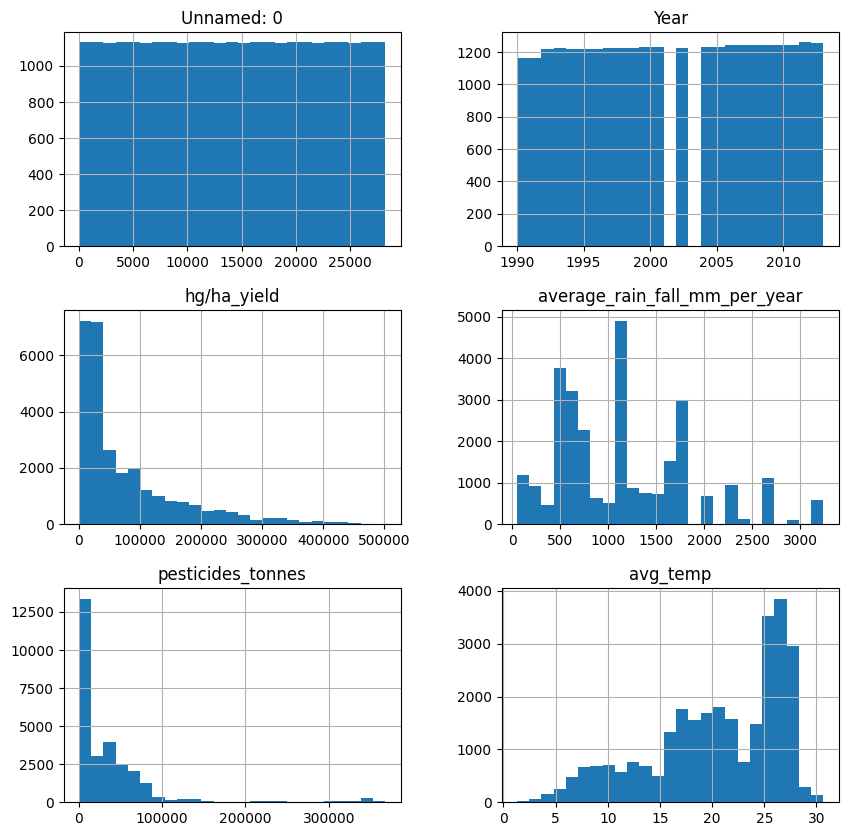

In [ ]:
#Visualize the dataset for a better overview
yield_df_1.hist(bins = 25,figsize=(10,10));

In [ ]:
# Calculate the mean of each item across different years
mean_per_item = yield_df_1.groupby('Item')['hg/ha_yield'].mean().reset_index()
mean_per_item_sorted = mean_per_item.sort_values(by='hg/ha_yield', ascending=False)

mean_per_item_sorted


Item    hg/ha_yield
3              Potatoes  199801.549579
0               Cassava  150479.466993
7        Sweet potatoes  119057.793772
9                  Yams  114140.345927
2  Plantains and others  106041.320144
4           Rice, paddy   40730.434770
1                 Maize   36310.070614
8                 Wheat   30116.267825
5               Sorghum   18635.777229
6              Soybeans   16731.092771

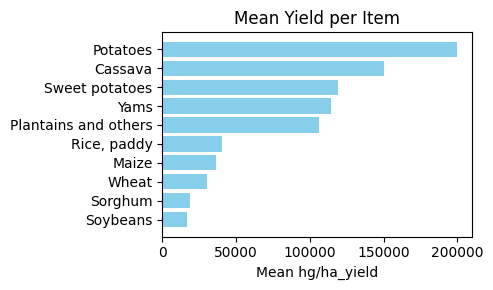

In [ ]:
# Plotting for bar table
plt.figure(figsize=(5, 3))
plt.barh(mean_per_item_sorted['Item'], mean_per_item_sorted['hg/ha_yield'], color='skyblue')
plt.xlabel('Mean hg/ha_yield')
plt.title('Mean Yield per Item')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest mean at the top
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the mean of each item across different years
mean_yield_per_country = yield_df_1.groupby('Area')['hg/ha_yield'].mean().reset_index()
mean_yield_per_country_sorted = mean_yield_per_country.sort_values(by='hg/ha_yield', ascending=False)

mean_yield_per_country_sorted

Area    hg/ha_yield
97             United Kingdom  240956.478261
12                    Belgium  216468.461538
24                    Denmark  214033.020000
68                Netherlands  204151.202899
45                    Ireland  197913.695652
69                New Zealand  191931.826087
89                     Sweden  187405.500000
9                     Bahrain  153237.551724
72                     Norway  146115.326087
90                Switzerland  144960.282609
33                    Germany  143631.344444
31                    Finland  135014.521739
48                      Japan  128851.875776
61                  Mauritius  125586.257426
47                    Jamaica  122347.869565
32                     France  114424.768116
27                      Egypt  114375.304348
6                     Austria  113044.354167
5                   Australia  112951.409938
88                   Suriname  107148.318841
46                      Italy  100250.621118
85                      Spain   96839.627329
28                El Salvador   91608.391304
35                     Greece   90508.850932
21                      Chile   89396.582609
3                   Argentina   89304.434783
62                     Mexico   88850.902174
77                   Portugal   88074.978261
51                     Latvia   88061.619048
78                      Qatar   86893.130435
83                   Slovenia   85678.726190
30                    Estonia   85610.428571
58                   Malaysia   85322.387097
76                     Poland   84162.961538
94                     Turkey   83622.320000
43                  Indonesia   83567.036232
81               Saudi Arabia   82455.902174
36                  Guatemala   80925.112745
42                      India   80884.467391
71                      Niger   76498.925466
52                    Lebanon   75617.434783
82                    Senegal   74946.934783
11                    Belarus   74679.555556
14                     Brazil   73583.797101
75                       Peru   73439.178744
59                       Mali   72979.323671
4                     Armenia   71811.111111
70                  Nicaragua   70050.420765
64                    Morocco   68860.279503
25         Dominican Republic   68783.059783
63                 Montenegro   68545.833333
87                      Sudan   67726.642857
38                     Guyana   67428.250000
74           Papua New Guinea   66645.521739
55                  Lithuania   66259.492063
8                     Bahamas   65443.537313
54                      Libya   65335.420290
22                   Colombia   65041.396135
84               South Africa   64181.881988
41                    Hungary   63942.826087
19                     Canada   62874.858696
50                      Kenya   62572.769565
86                  Sri Lanka   60965.983696
34                      Ghana   59744.329032
98                    Uruguay   59253.540373
92                   Thailand   59079.006211
1                     Algeria   58872.491228
23                    Croatia   57934.923810
0                     Albania   57692.282828
93                    Tunisia   53974.579710
40                   Honduras   53530.053922
10                 Bangladesh   52518.088435
73                   Pakistan   50998.919255
91                 Tajikistan   50361.680000
57                     Malawi   48811.198830
39                      Haiti   46843.445652
37                     Guinea   46641.771930
18                   Cameroon   46599.491304
53                    Lesotho   46292.739130
15                   Bulgaria   45384.601449
96                    Ukraine   43626.198413
79                    Romania   43522.869565
65                 Mozambique   43254.826087
100                  Zimbabwe   40264.288043
44                       Iraq   39799.717391
7                  Azerbaijan   39727.413793
49                 Kazakhstan   39544.492063
99                     Zambia   39425.603261
66                  

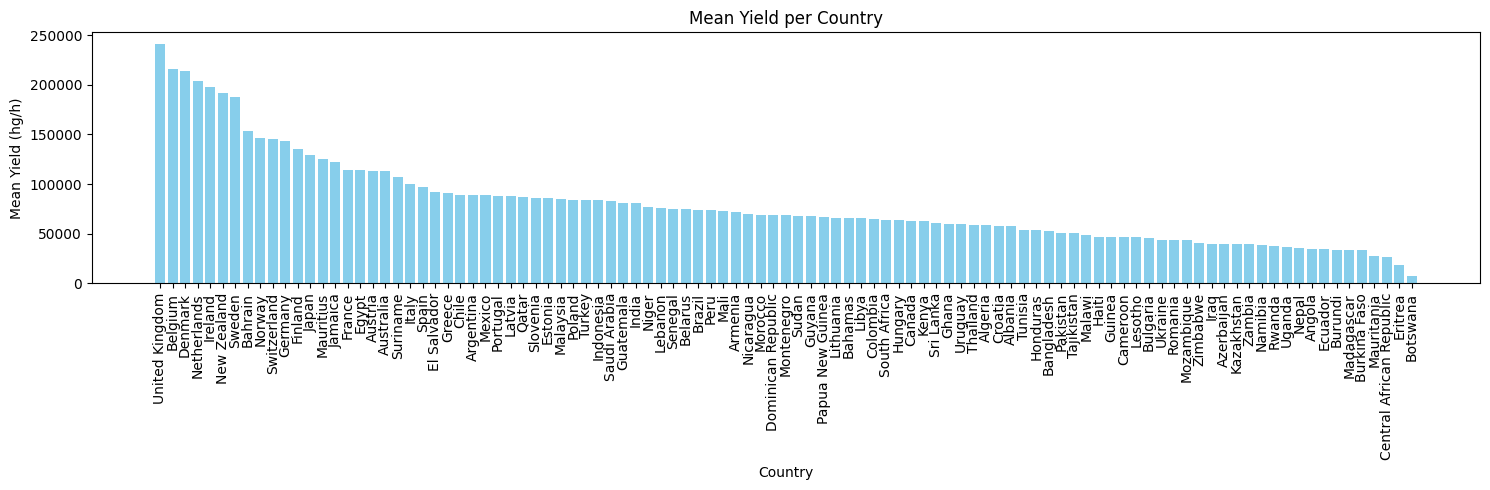

In [ ]:
# Plotting for bar table
plt.figure(figsize=(15, 5))
plt.bar(mean_yield_per_country_sorted['Area'], mean_yield_per_country_sorted['hg/ha_yield'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Mean Yield (hg/h)')
plt.title('Mean Yield per Country')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the mean of rainfall across different countries
meanrainfall_per_country = yield_df_1.groupby('Area')['average_rain_fall_mm_per_year'].mean().reset_index()
meanrainfall_per_country_sorted = meanrainfall_per_country.sort_values(by='average_rain_fall_mm_per_year', ascending=False)

meanrainfall_per_country_sorted

Area  average_rain_fall_mm_per_year
22                   Colombia                         3240.0
74           Papua New Guinea                         3142.0
58                   Malaysia                         2875.0
43                  Indonesia                         2702.0
10                 Bangladesh                         2666.0
38                     Guyana                         2387.0
88                   Suriname                         2331.0
70                  Nicaragua                         2280.0
26                    Ecuador                         2274.0
47                    Jamaica                         2051.0
61                  Mauritius                         2041.0
36                  Guatemala                         1996.0
40                   Honduras                         1976.0
28                El Salvador                         1784.0
14                     Brazil                         1761.0
75                       Peru                         1738.0
69                New Zealand                         1732.0
87                      Sudan                         1712.0
86                  Sri Lanka                         1712.0
48                      Japan                         1668.0
37                     Guinea                         1651.0
92                   Thailand                         1622.0
18                   Cameroon                         1604.0
90                Switzerland                         1537.0
21                      Chile                         1522.0
56                 Madagascar                         1513.0
67                      Nepal                         1500.0
0                     Albania                         1485.0
39                      Haiti                         1440.0
72                     Norway                         1414.0
25         Dominican Republic                         1410.0
20   Central African Republic                         1342.0
98                    Uruguay                         1300.0
8                     Bahamas                         1292.0
17                    Burundi                         1274.0
97             United Kingdom                         1220.0
80                     Rwanda                         1212.0
34                      Ghana                         1187.0
57                     Malawi                         1181.0
95                     Uganda                         1180.0
83                   Slovenia                         1162.0
45                    Ireland                         1118.0
23                    Croatia                         1113.0
6                     Austria                         1110.0
42                      India                         1083.0
65                 Mozambique                         1032.0
99                     Zambia                         1020.0
2                      Angola                         1010.0
32                     France                          867.0
77                   Portugal                          854.0
12                    Belgium                          847.0
46                      Italy                          832.0
53                    Lesotho                          788.0
68                Netherlands                          778.0
62                     Mexico                          758.0
16               Burkina Faso                          748.0
24                    Denmark                          703.0
33                    Germany                          700.0
91                 Tajikistan                          691.0
82                    Senegal                          686.0
52                    Lebanon                          661.0
100                  Zimbabwe                          657.0
55                  Lithuania                          656.0
35                     Greece                          652.0
51                     Latvia                          641.0

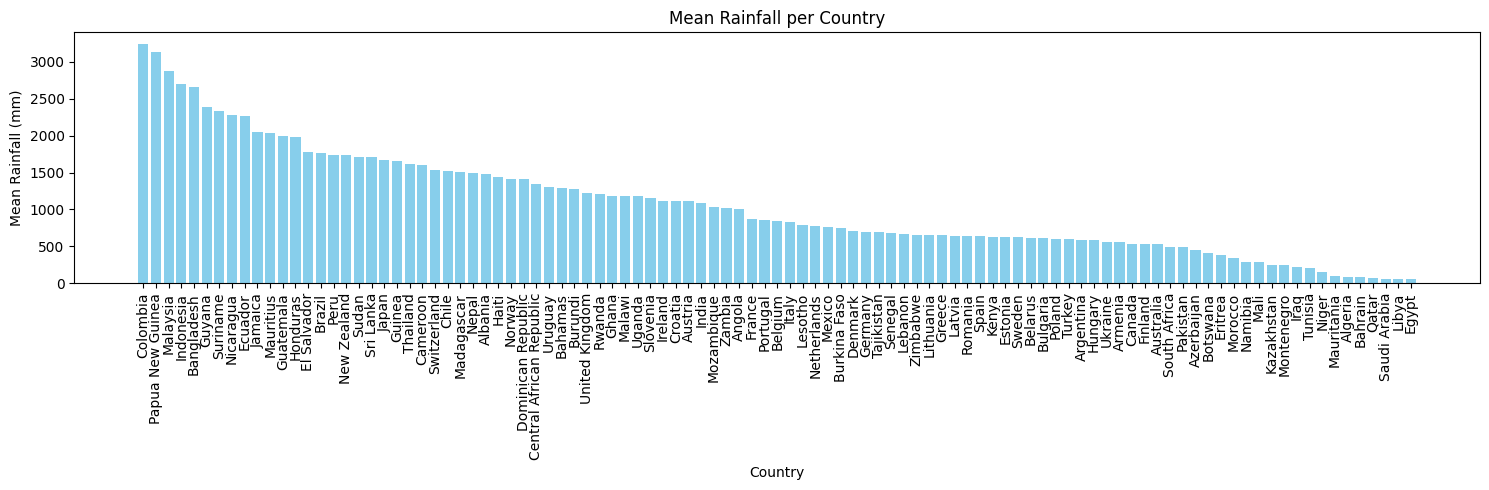

In [ ]:
# Plotting for bar table
plt.figure(figsize=(15, 5))
plt.bar(meanrainfall_per_country_sorted['Area'], meanrainfall_per_country_sorted['average_rain_fall_mm_per_year'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Mean Rainfall (mm)')
plt.title('Mean Rainfall per Country')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the mean of temperature across different countries
meantemperature_per_country = yield_df_1.groupby('Area')['avg_temp'].mean().reset_index()
meantemperature_per_country_sorted = meantemperature_per_country.sort_values(by='avg_temp', ascending=False)

meantemperature_per_country_sorted

Area   avg_temp
71                      Niger  29.718696
16               Burkina Faso  28.737391
87                      Sudan  28.467500
78                      Qatar  27.912609
92                   Thailand  27.874348
60                 Mauritania  27.850435
59                       Mali  27.706087
38                     Guyana  27.346452
37                     Guinea  27.345146
47                    Jamaica  27.342609
58                   Malaysia  27.287419
88                   Suriname  27.220870
39                      Haiti  27.198696
70                  Nicaragua  27.095574
43                  Indonesia  26.931087
34                      Ghana  26.919226
25         Dominican Republic  26.763043
9                     Bahrain  26.703448
86                  Sri Lanka  26.603913
81               Saudi Arabia  26.360435
10                 Bangladesh  26.101497
28                El Salvador  26.075652
42                      India  26.012589
20   Central African Republic  25.537391
8                     Bahamas  25.463582
82                    Senegal  25.359130
74           Papua New Guinea  25.298696
18                   Cameroon  25.203043
22                   Colombia  24.931304
29                    Eritrea  24.756000
40                   Honduras  24.665637
73                   Pakistan  24.394976
2                      Angola  24.311341
61                  Mauritius  24.219703
95                     Uganda  23.794783
14                     Brazil  22.673913
44                       Iraq  21.951522
65                 Mozambique  21.840870
27                      Egypt  21.637609
17                    Burundi  21.410435
99                     Zambia  21.064783
100                  Zimbabwe  20.831739
57                     Malawi  20.629532
26                    Ecuador  20.503913
62                     Mexico  20.421576
66                    Namibia  20.297805
54                      Libya  20.084565
56                 Madagascar  19.924783
36                  Guatemala  19.865098
52                    Lebanon  19.778261
80                     Rwanda  19.686957
13                   Botswana  19.605313
93                    Tunisia  19.490870
35                     Greece  18.163478
64                    Morocco  18.155870
84               South Africa  17.829130
3                   Argentina  17.708478
1                     Algeria  17.484825
75                       Peru  17.276522
98                    Uruguay  16.980870
50                      Kenya  16.653478
5                   Australia  16.593696
77                   Portugal  16.376957
0                     Albania  16.300101
85                      Spain  15.608986
67                      Nepal  15.368696
94                     Turkey  15.122864
48                      Japan  14.967391
53                    Lesotho  14.626522
69                New Zealand  13.202174
7                  Azerbaijan  12.439828
79                    Romania  11.845652
63                 Montenegro  11.516250
32                     France  11.390870
12                    Belgium  11.016923
41                    Hungary  10.810435
23                    Croatia  10.646667
83                   Slovenia  10.646667
46                      Italy  10.404348
68                Netherlands  10.178696
21                      Chile   9.717174
97             United Kingdom   9.602783
4                     Armenia   9.580952
45                    Ireland   9.458696
15                   Bulgaria   9.391304
6                     Austria   9.121979
24                    Denmark   8.980400
76                     Poland   8.535256
91                 Tajikistan   8.525040
96                    Ukraine   8.413333
33                    Germany   8.386963
90                Switzerland   7.906087
89                     Sweden   7.567826
19                     Canada   7.191884
55                  Lithuania   6.740476
11                    Belarus   6.735238
51                     Latvia   6.517143
30     

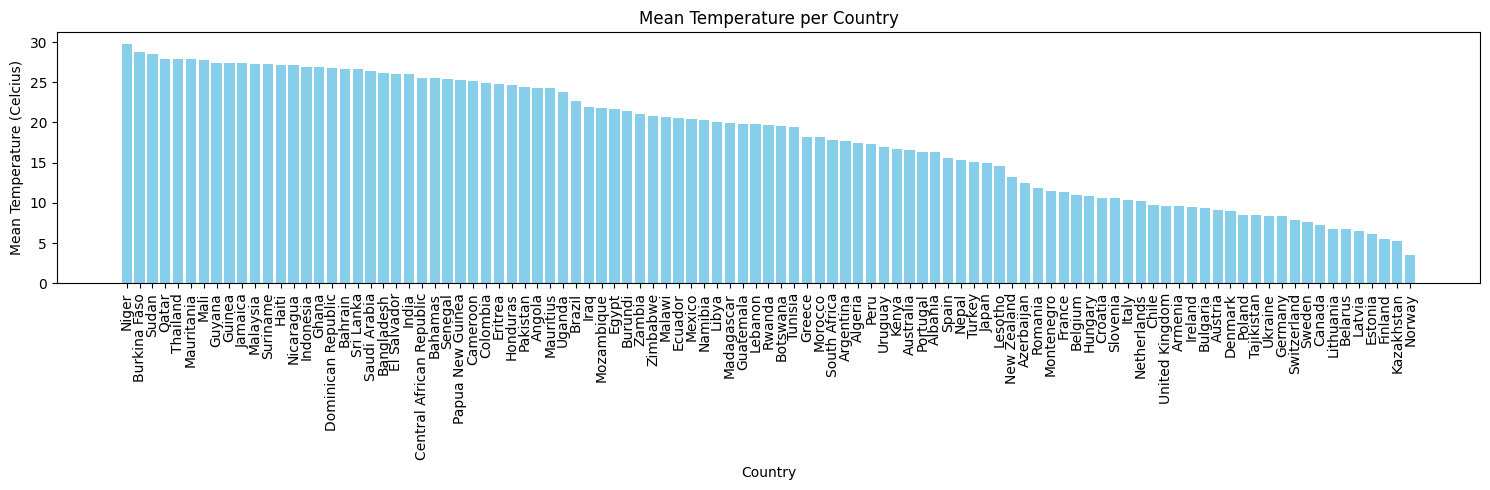

In [ ]:
# Plotting for bar table
plt.figure(figsize=(15, 5))
plt.bar(meantemperature_per_country_sorted['Area'], meantemperature_per_country_sorted['avg_temp'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Mean Temperature (Celcius)')
plt.title('Mean Temperature per Country')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the mean of temperature across different countries
medianpesticide_per_country = yield_df_1.groupby('Area')['pesticides_tonnes'].median().reset_index()
medianpesticide_per_country_sorted = medianpesticide_per_country.sort_values(by='pesticides_tonnes', ascending=False)

medianpesticide_per_country_sorted

Area  pesticides_tonnes
14                     Brazil         145552.000
32                     France          84011.000
46                      Italy          81217.600
48                      Japan          78735.450
3                   Argentina          63700.170
22                   Colombia          51435.130
42                      India          46195.000
96                    Ukraine          42129.320
58                   Malaysia          39406.480
85                      Spain          39043.000
19                     Canada          38258.200
62                     Mexico          34468.930
33                    Germany          34431.720
5                   Australia          34091.000
94                     Turkey          33089.000
97             United Kingdom          31077.000
84               South Africa          26857.000
92                   Thailand          24062.000
77                   Portugal          13984.910
64                    Morocco          13697.000
21                      Chile          13156.090
36                  Guatemala          12004.330
68                Netherlands          10568.000
76                     Poland           9824.000
75                       Peru           8322.880
11                    Belarus           8306.310
41                    Hungary           8231.500
35                     Greece           8002.200
26                    Ecuador           7953.420
79                    Romania           7875.700
49                 Kazakhstan           7044.900
12                    Belgium           6712.050
73                   Pakistan           6183.000
27                      Egypt           5471.000
40                   Honduras           5283.930
25         Dominican Republic           4971.000
98                    Uruguay           4433.040
70                  Nicaragua           4373.100
69                New Zealand           3904.000
24                    Denmark           3894.000
6                     Austria           3531.800
10                 Bangladesh           3295.780
54                      Libya           3277.130
81               Saudi Arabia           3194.480
28                El Salvador           3164.620
100                  Zimbabwe           3094.080
15                   Bulgaria           2747.250
87                      Sudan           2469.470
23                    Croatia           2388.000
45                    Ireland           2268.100
90                Switzerland           1922.500
1                     Algeria           1828.920
52                    Lebanon           1816.000
89                     Sweden           1789.000
99                     Zambia           1670.000
86                  Sri Lanka           1654.410
43                  Indonesia           1597.000
50                      Kenya           1578.000
31                    Finland           1475.390
83                   Slovenia           1155.230
55                  Lithuania           1023.600
47                    Jamaica            909.710
44                       Iraq            828.620
18                   Cameroon            813.770
72                     Norway            761.970
93                    Tunisia            746.750
61                  Mauritius            644.120
51                     Latvia            594.460
0                     Albania            565.820
88                   Suriname            537.490
82                    Senegal            465.950
30                    Estonia            351.000
8                     Bahamas            315.740
38                     Guyana            289.900
37                     Guinea            278.770
91                 Tajikistan            264.600
80                     Rwanda            181.600
57                     Malawi            177.240
7                  Azerbaijan            148.680
34                      Ghana            134.250
67                      Nepal            122.040
17     

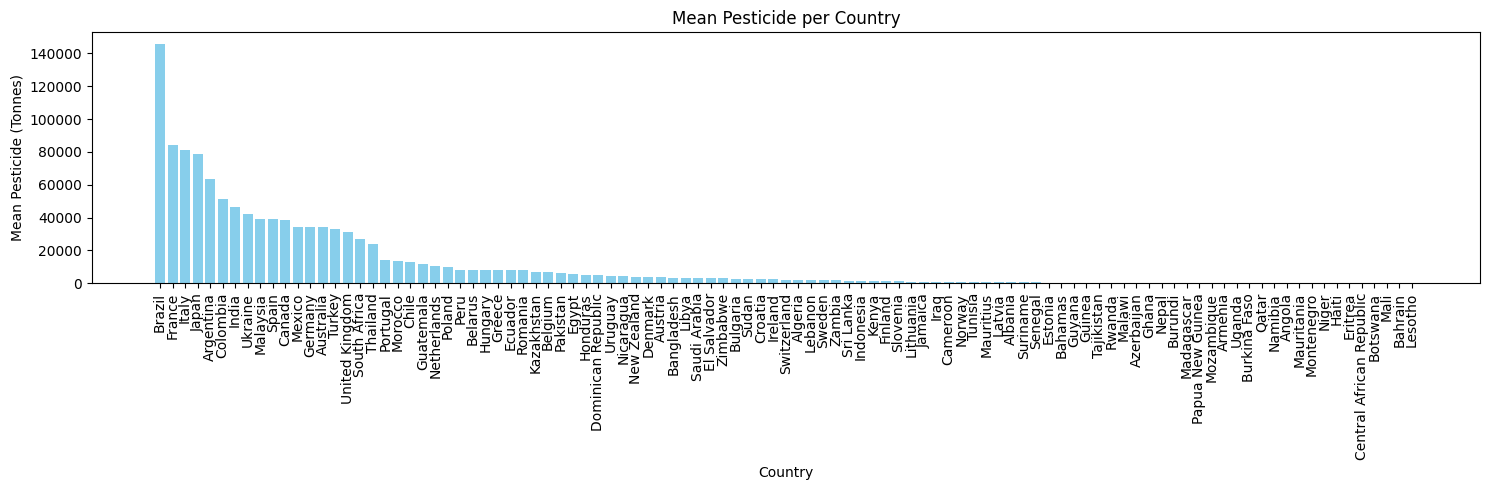

In [ ]:
# Plotting for bar table
plt.figure(figsize=(15, 5))
plt.bar(medianpesticide_per_country_sorted['Area'], medianpesticide_per_country_sorted['pesticides_tonnes'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Mean Pesticide (Tonnes)')
plt.title('Mean Pesticide per Country')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

**2. yield.csv**

In [ ]:
#To get count/mean/std/min/max generally
yield_df_2.describe()

Area Code  Element Code     Item Code     Year Code          Year           Value
count  56717.000000       56717.0  56717.000000  56717.000000  56717.000000    56717.000000
mean     125.650422        5419.0    111.611651   1989.669570   1989.669570    62094.660084
std       75.120195           0.0    101.278435     16.133198     16.133198    67835.932856
min        1.000000        5419.0     15.000000   1961.000000   1961.000000        0.000000
25%       58.000000        5419.0     56.000000   1976.000000   1976.000000    15680.000000
50%      122.000000        5419.0    116.000000   1991.000000   1991.000000    36744.000000
75%      184.000000        5419.0    125.000000   2004.000000   2004.000000    86213.000000
max      351.000000        5419.0    489.000000   2016.000000   2016.000000  1000000.000000

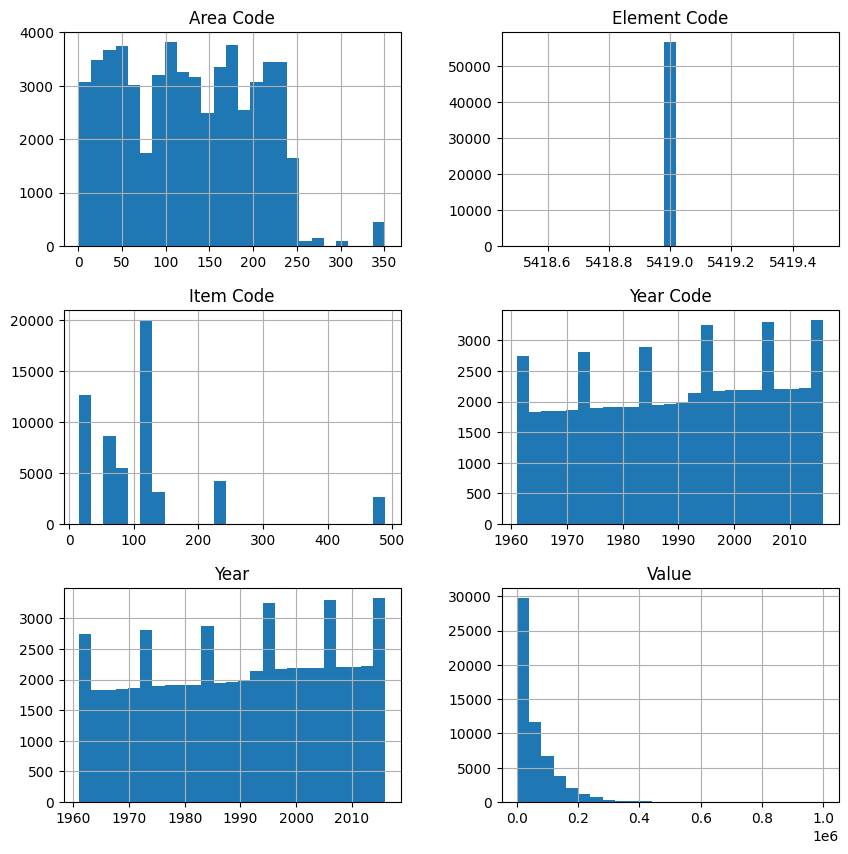

In [ ]:
#Visualize the dataset for a better overview
yield_df_2.hist(bins = 25,figsize=(10,10));

In [ ]:
# Calculate the mean of each item across different years
mean_per_item_2 = yield_df_2.groupby('Item')['Value'].mean().reset_index()
mean_per_item_sorted_2 = mean_per_item_2.sort_values(by='Value', ascending=False)

mean_per_item_sorted_2

Item          Value
3              Potatoes  150083.237176
0               Cassava   92768.762854
7        Sweet potatoes   89885.121460
2  Plantains and others   86282.765637
9                  Yams   80903.501587
4           Rice, paddy   30239.233112
1                 Maize   29360.009616
8                 Wheat   24607.424351
5               Sorghum   17091.164036
6              Soybeans   14162.731632

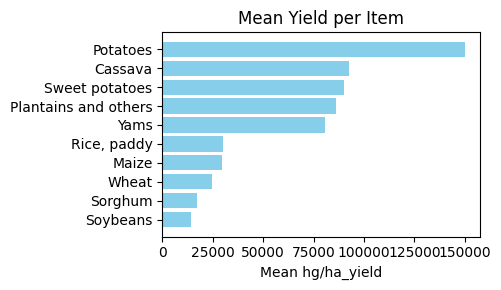

In [ ]:
# Plotting for bar table
plt.figure(figsize=(5, 3))
plt.barh(mean_per_item_sorted_2['Item'], mean_per_item_sorted_2['Value'], color='skyblue')
plt.xlabel('Mean hg/ha_yield')
plt.title('Mean Yield per Item')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest mean at the top
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the mean of each yield across different countries
mean_yield_per_country_2 = yield_df_2.groupby('Area')['Value'].mean().reset_index()
mean_yield_per_country_2 = mean_yield_per_country_2.sort_values(by='Value', ascending=False)

mean_yield_per_country_2

Area          Value
45                                Cook Islands  234591.392857
16                                     Belgium  215905.450980
199                             United Kingdom  190226.016260
55                                     Denmark  186669.386555
132                                Netherlands  179758.190476
95                                     Ireland  174037.455357
12                                     Bahrain  172153.131579
182                                     Sweden  169868.883929
17                          Belgium-Luxembourg  167399.948718
96                                      Israel  162509.571429
134                                New Zealand  154968.194093
140             Occupied Palestinian Territory  154450.604396
103                                     Kuwait  152995.715447
112                                 Luxembourg  149374.156863
183                                Switzerland  143364.994924
139                                     Norway  142096.991071
20                                     Bermuda  140582.464286
68                               Faroe Islands  139114.107143
198                       United Arab Emirates  138553.138889
73                            French Polynesia  135189.446429
77                                     Germany  129214.523316
90                                     Iceland  129055.803571
190                                      Tonga  124885.821429
14                                    Barbados  124279.562500
99                                       Japan  115916.082500
121                                  Mauritius  114664.251938
70                                     Finland  112943.116071
9                                      Austria  112695.078431
49                                      Cyprus  111002.464286
162                                      Samoa  110668.151786
207                  Wallis and Futuna Islands  109262.946429
81                                  Guadeloupe  108730.847059
119                                 Martinique  108685.060185
158                                    Réunion  103983.164706
201                   United States of America  102928.051020
60                                       Egypt  101612.895013
100                                     Jordan   99960.289720
98                                     Jamaica   99916.770408
71                                      France   96153.336420
173                            Solomon Islands   94797.488688
141                                       Oman   94507.724138
50                                     Czechia   92319.531250
106                                     Latvia   91893.540000
138                                       Niue   91718.892857
8                                    Australia   89112.372449
97                                       Italy   89108.553571
168                                 Seychelles   88504.517857
64                                     Estonia   88422.780000
172                                   Slovenia   87835.500000
40                   China, Taiwan Province of   87087.895089
118                                      Malta   85436.187500
170                                  Singapore   84456.310680
177                                      Spain   82925.151436
149                                     Poland   82686.932961
79                                      Greece   81772.527322
30                                  Cabo Verde   80008.343750
152                                      Qatar   79631.327731
181                                   Suriname   79180.883929
15                                     Belarus   77449.280000
46                                  Costa Rica   77369.193548
159                      Saint Kitts and Nevis   76953.670659
122                                     Mexico   76793.551339
161           Saint Vincent and the Grenadines   76372.487179
7                                      Armenia   76094.746667
153         

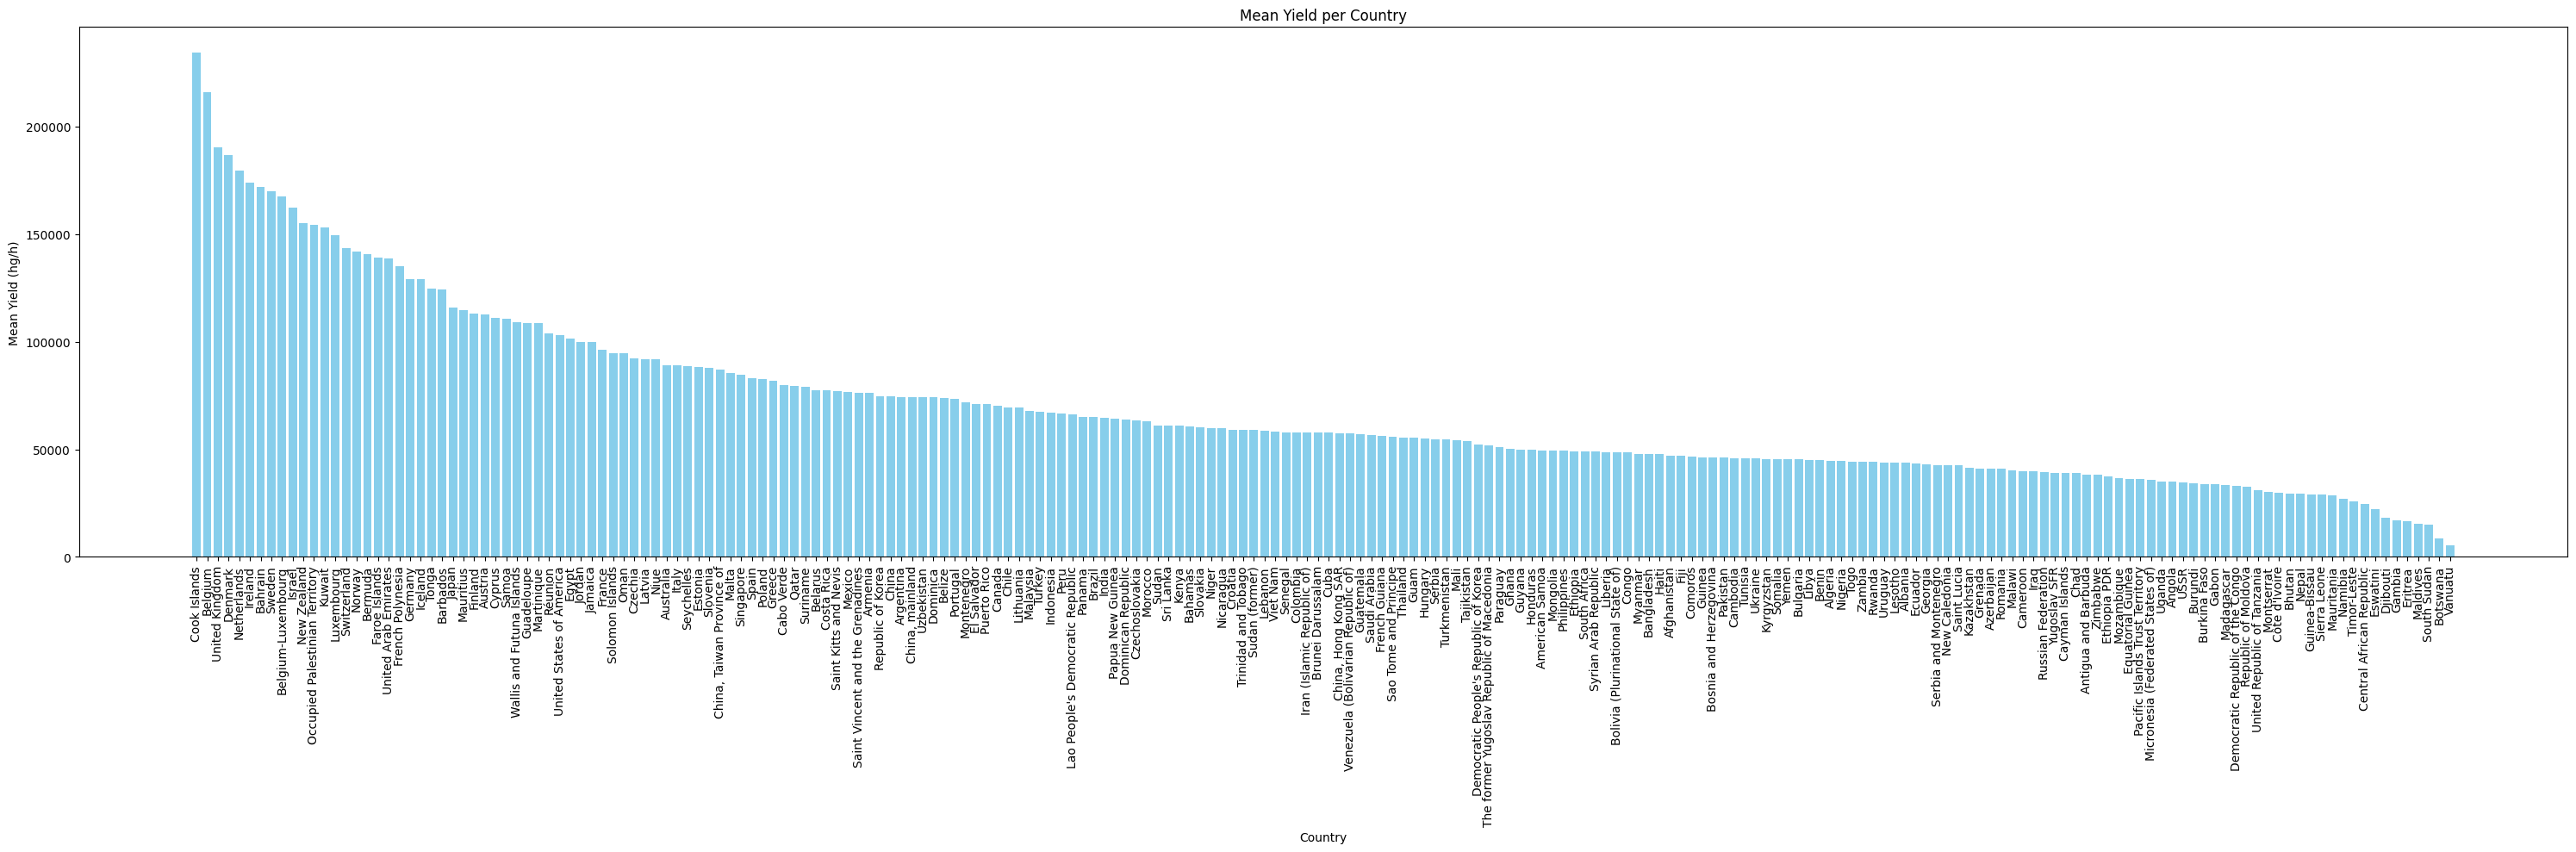

In [ ]:
# Plotting for bar table
plt.figure(figsize=(30, 10))
plt.bar(mean_yield_per_country_2['Area'], mean_yield_per_country_2['Value'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Mean Yield (hg/h)')
plt.title('Mean Yield per Country')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()


**3. pesticides.csv**

In [ ]:
#To get count/mean/std/min/max
pesticides_df.describe()

Year         Value
count  4349.000000  4.349000e+03
mean   2003.138883  2.030334e+04
std       7.728044  1.177362e+05
min    1990.000000  0.000000e+00
25%    1996.000000  9.300000e+01
50%    2003.000000  1.137560e+03
75%    2010.000000  7.869000e+03
max    2016.000000  1.807000e+06

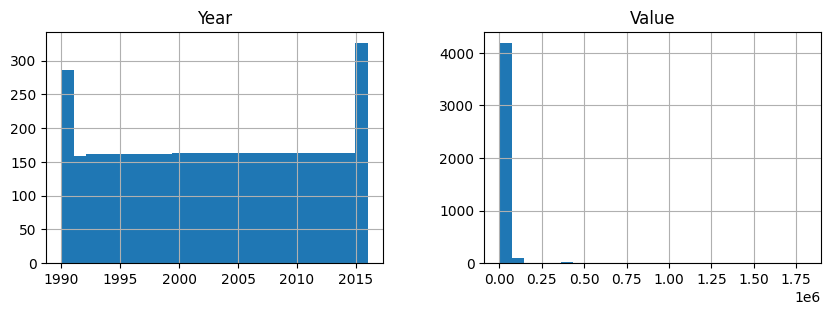

In [ ]:
#Visualize the dataset for a better overview
pesticides_df.hist(bins = 25,figsize=(10,3));

In [ ]:
# Calculate the median of pesticides used across different countries
median_pesticides_per_country_2 = pesticides_df.groupby('Area')['Value'].median().reset_index()
median_pesticides_per_country_2_sorted = median_pesticides_per_country_2.sort_values(by='Value', ascending=False)

median_pesticides_per_country_2_sorted

Area        Value
35                             China, mainland  1325226.000
159                   United States of America   407779.200
21                                      Brazil   182446.000
154                                       USSR    89200.000
75                                       Italy    80454.000
55                                      France    78577.000
77                                       Japan    67869.720
4                                    Argentina    64568.950
36                                    Colombia    52883.000
69                                       India    49157.000
156                                    Ukraine    47057.850
92                                    Malaysia    39406.480
136                                      Spain    39286.000
28                                      Canada    38456.000
58                                     Germany    35273.170
98                                      Mexico    34468.930
6                                    Australia    34200.000
152                                     Turkey    33089.000
157                             United Kingdom    30754.400
135                               South Africa    26857.000
124                         Russian Federation    25961.000
121                          Republic of Korea    24620.000
145                                   Thailand    23960.000
163                                   Viet Nam    19154.000
116                                   Paraguay    15514.000
119                                   Portugal    13774.180
100                                    Morocco    13697.000
61                                   Guatemala    12004.330
40                                  Costa Rica    11125.000
47                                     Ecuador    11040.470
31                                       Chile    10939.180
105                                Netherlands    10505.000
118                                     Poland     9824.000
153                               Turkmenistan     9712.000
34                   China, Taiwan Province of     9396.000
15                          Belgium-Luxembourg     9040.645
67                                     Hungary     8725.500
19            Bolivia (Plurinational State of)     8480.910
117                                       Peru     8414.170
13                                     Belarus     8306.310
60                                      Greece     8189.800
79                                  Kazakhstan     8112.000
123                                    Romania     7565.700
160                                    Uruguay     7455.260
14                                     Belgium     6516.470
71                  Iran (Islamic Republic of)     6425.740
48                                       Egypt     6156.000
113                                   Pakistan     5962.000
66                                    Honduras     5736.630
46                          Dominican Republic     4971.000
74                                      Israel     4911.090
43                                     Czechia     4666.255
108                                  Nicaragua     4413.820
107                                New Zealand     4050.000
162         Venezuela (Bolivarian Republic of)     3928.000
11                                  Bangladesh     3874.260
45                                     Denmark     3623.000
87                                       Libya     3548.000
129                               Saudi Arabia     3535.230
7                                      Austria     3531.800
49                                 El Salvador     3231.130
167                                   Zimbabwe     3023.720
165                               Yugoslav SFR     2716.000
122                        Republic of Moldova     2658.660
23                                    Bulgaria     2618.500
73                                     Ireland     2529.200
114                   

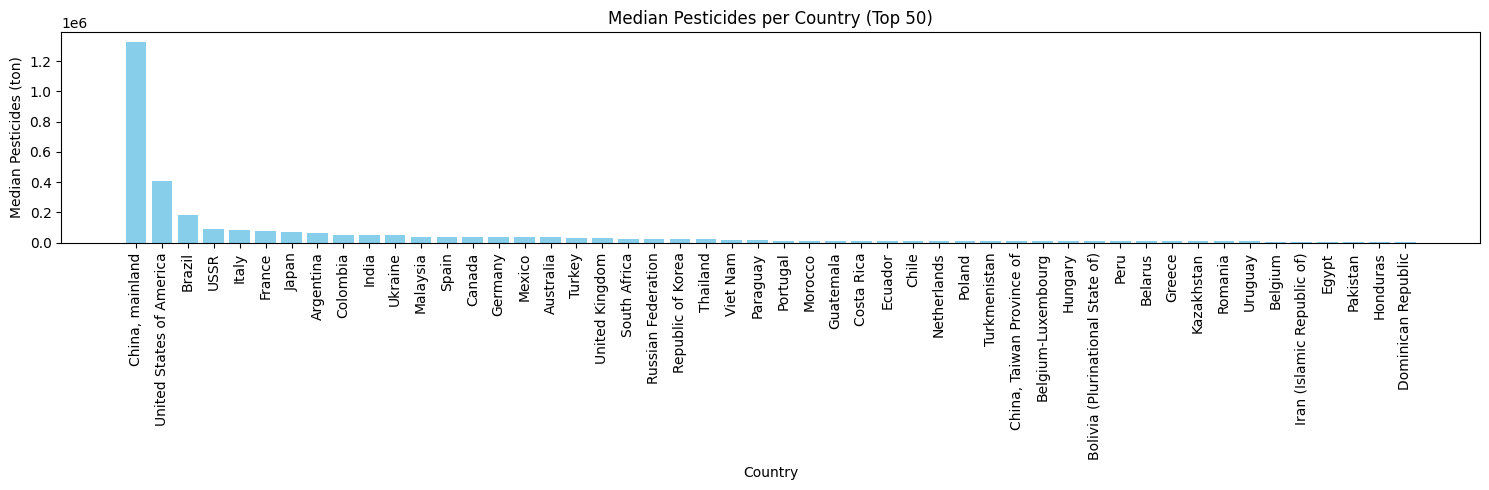

In [ ]:
# Plotting for bar table
top_50_countries = median_pesticides_per_country_2_sorted.head(50)

plt.figure(figsize=(15, 5))  # Adjust figure size for better visualization
plt.bar(top_50_countries['Area'], top_50_countries['Value'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Median Pesticides (ton)')
plt.title('Median Pesticides per Country (Top 50)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


**4. rainfall.csv**

In [ ]:
#To get count/mean/std/min/max
rainfall_df.describe()

Year
count  6727.000000
mean   2001.354839
std       9.530114
min    1985.000000
25%    1993.000000
50%    2001.000000
75%    2010.000000
max    2017.000000

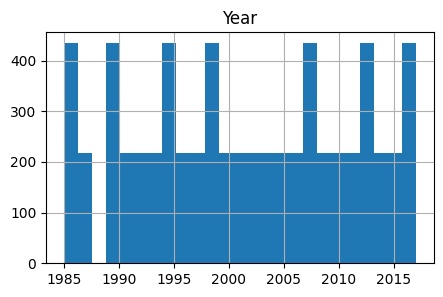

In [ ]:
#Visualize the dataset for a better overview
rainfall_df.hist(bins = 25,figsize=(5,3));

In [ ]:
# Calculate the mean of rainfall across different countries
mean_rainfall_per_country_2 = yield_df_2.groupby('Area')['Value'].mean().reset_index()
mean_rainfall_per_country_2_sorted = mean_yield_per_country_2.sort_values(by='Value', ascending=False)

mean_rainfall_per_country_2_sorted

Area          Value
45                                Cook Islands  234591.392857
16                                     Belgium  215905.450980
199                             United Kingdom  190226.016260
55                                     Denmark  186669.386555
132                                Netherlands  179758.190476
95                                     Ireland  174037.455357
12                                     Bahrain  172153.131579
182                                     Sweden  169868.883929
17                          Belgium-Luxembourg  167399.948718
96                                      Israel  162509.571429
134                                New Zealand  154968.194093
140             Occupied Palestinian Territory  154450.604396
103                                     Kuwait  152995.715447
112                                 Luxembourg  149374.156863
183                                Switzerland  143364.994924
139                                     Norway  142096.991071
20                                     Bermuda  140582.464286
68                               Faroe Islands  139114.107143
198                       United Arab Emirates  138553.138889
73                            French Polynesia  135189.446429
77                                     Germany  129214.523316
90                                     Iceland  129055.803571
190                                      Tonga  124885.821429
14                                    Barbados  124279.562500
99                                       Japan  115916.082500
121                                  Mauritius  114664.251938
70                                     Finland  112943.116071
9                                      Austria  112695.078431
49                                      Cyprus  111002.464286
162                                      Samoa  110668.151786
207                  Wallis and Futuna Islands  109262.946429
81                                  Guadeloupe  108730.847059
119                                 Martinique  108685.060185
158                                    Réunion  103983.164706
201                   United States of America  102928.051020
60                                       Egypt  101612.895013
100                                     Jordan   99960.289720
98                                     Jamaica   99916.770408
71                                      France   96153.336420
173                            Solomon Islands   94797.488688
141                                       Oman   94507.724138
50                                     Czechia   92319.531250
106                                     Latvia   91893.540000
138                                       Niue   91718.892857
8                                    Australia   89112.372449
97                                       Italy   89108.553571
168                                 Seychelles   88504.517857
64                                     Estonia   88422.780000
172                                   Slovenia   87835.500000
40                   China, Taiwan Province of   87087.895089
118                                      Malta   85436.187500
170                                  Singapore   84456.310680
177                                      Spain   82925.151436
149                                     Poland   82686.932961
79                                      Greece   81772.527322
30                                  Cabo Verde   80008.343750
152                                      Qatar   79631.327731
181                                   Suriname   79180.883929
15                                     Belarus   77449.280000
46                                  Costa Rica   77369.193548
159                      Saint Kitts and Nevis   76953.670659
122                                     Mexico   76793.551339
161           Saint Vincent and the Grenadines   76372.487179
7                                      Armenia   76094.746667
153         

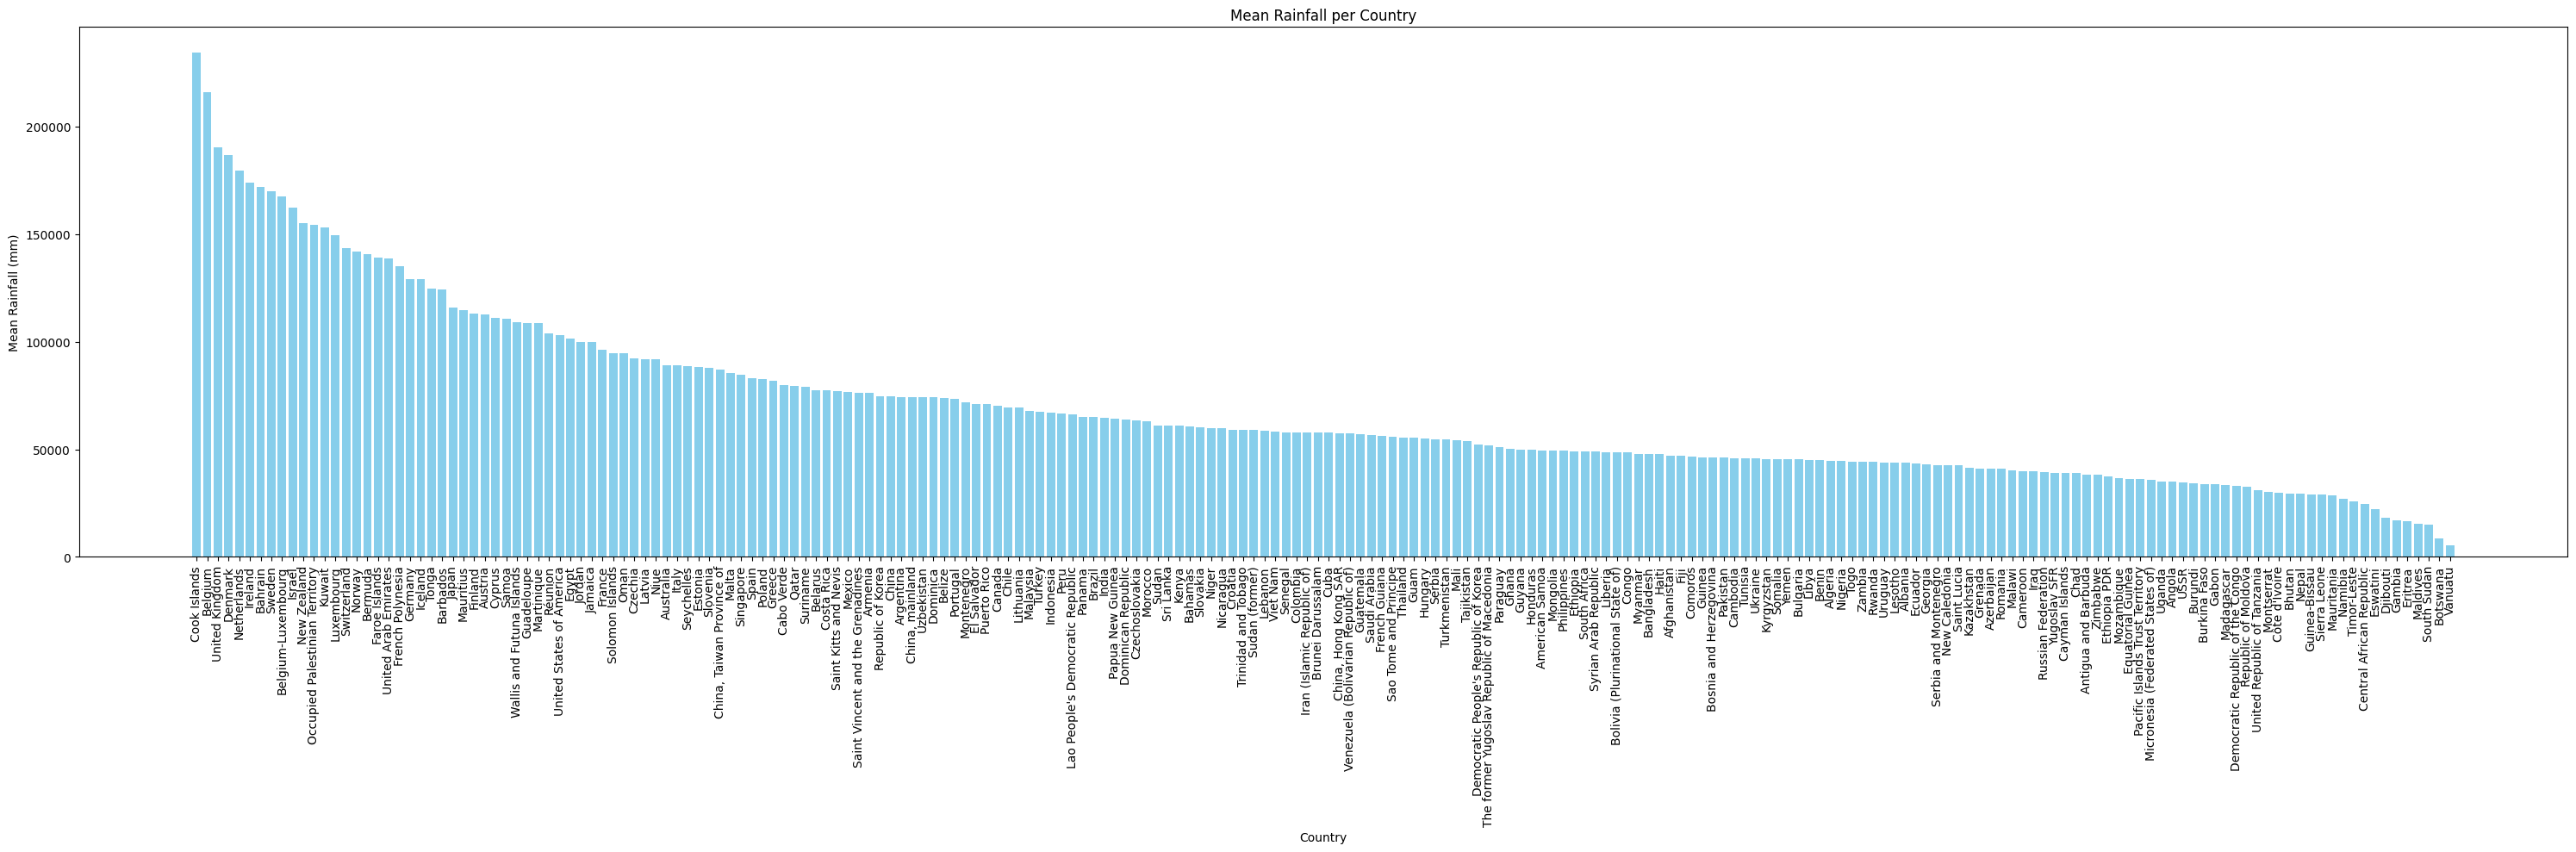

In [ ]:
# Plotting for bar table
plt.figure(figsize=(30, 10))
plt.bar(mean_rainfall_per_country_2_sorted['Area'], mean_rainfall_per_country_2_sorted['Value'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Mean Rainfall (mm)')
plt.title('Mean Rainfall per Country')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()


**5. temp.csv**

In [ ]:
#To get count/mean/std/min/max
temp_df.describe()

year      avg_temp
count  71311.000000  68764.000000
mean    1905.799007     16.183876
std       67.102099      7.592960
min     1743.000000    -14.350000
25%     1858.000000      9.750000
50%     1910.000000     16.140000
75%     1962.000000     23.762500
max     2013.000000     30.730000

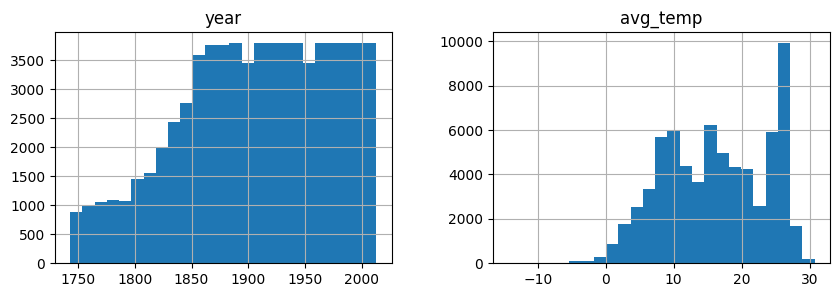

In [ ]:
#Visualize the dataset for a better overview
temp_df.hist(bins = 25,figsize=(10,3));

In [ ]:
# Calculate the mean of rainfall across different countries
mean_temp_per_country = temp_df.groupby('country')['avg_temp'].mean().reset_index()
mean_temp_per_country_sorted = mean_temp_per_country.sort_values(by='avg_temp', ascending=False)

mean_temp_per_country_sorted

country   avg_temp
90                                Niger  29.039801
19                         Burkina Faso  28.049167
115                               Sudan  27.372804
123                            Thailand  27.154263
110                             Somalia  27.150851
49                        Guinea Bissau  27.053861
77                           Mauritania  27.023851
76                                 Mali  26.969557
99                                Qatar  26.766707
61                              Jamaica  26.624021
106                        Sierra Leone  26.577688
48                               Guinea  26.577688
128                United Arab Emirates  26.569497
75                             Malaysia  26.566570
50                               Guyana  26.541657
107                           Singapore  26.522733
91                              Nigeria  26.497507
51                                Haiti  26.459202
116                            Suriname  26.423771
89                            Nicaragua  26.374104
45                                Ghana  26.286093
56                            Indonesia  26.234788
96                          Philippines  26.199480
33                   Dominican Republic  25.992032
42                                Gabon  25.975203
114                           Sri Lanka  25.926161
31                        Côte D'Ivoire  25.855227
10                              Bahrain  25.843195
133                           Venezuela  25.765400
122                            Tanzania  25.748806
69                              Liberia  25.667062
37                    Equatorial Guinea  25.486757
11                           Bangladesh  25.474085
103                        Saudi Arabia  25.403631
36                          El Salvador  25.362034
55                                India  25.311947
23             Central African Republic  24.944730
94                     Papua New Guinea  24.857121
9                               Bahamas  24.754978
104                             Senegal  24.622152
21                             Cameroon  24.613784
134                             Vietnam  24.370776
26                             Colombia  24.291642
65                                 Laos  24.092684
38                              Eritrea  24.002643
52                             Honduras  23.883690
27                                Congo  23.861014
3                                Angola  23.693649
93                             Pakistan  23.593677
78                            Mauritius  23.517535
126                              Uganda  23.231702
28   Congo (Democratic Republic Of The)  22.273793
120                              Taiwan  22.105087
17                               Brazil  21.759304
53                            Hong Kong  21.430862
84                           Mozambique  21.202102
20                              Burundi  20.803688
35                                Egypt  20.726970
58                                 Iraq  20.725200
135                              Zambia  20.427535
136                            Zimbabwe  20.202183
74                               Malawi  20.000922
34                              Ecuador  19.850688
79                               Mexico  19.802868
85                              Namibia  19.635541
73                           Madagascar  19.199067
70                                Libya  19.184042
47                            Guatemala  19.165568
102                              Rwanda  19.061701
16                             Botswana  18.992548
67                              Lebanon  18.925792
124                             Tunisia  18.424850
119                               Syria  18.350874
46                               Greece  17.421839
83                              Morocco  17.235560
111                        South Africa  17.209522
4                             Argentina  17.055535
95                                 Peru  16.763437
2  

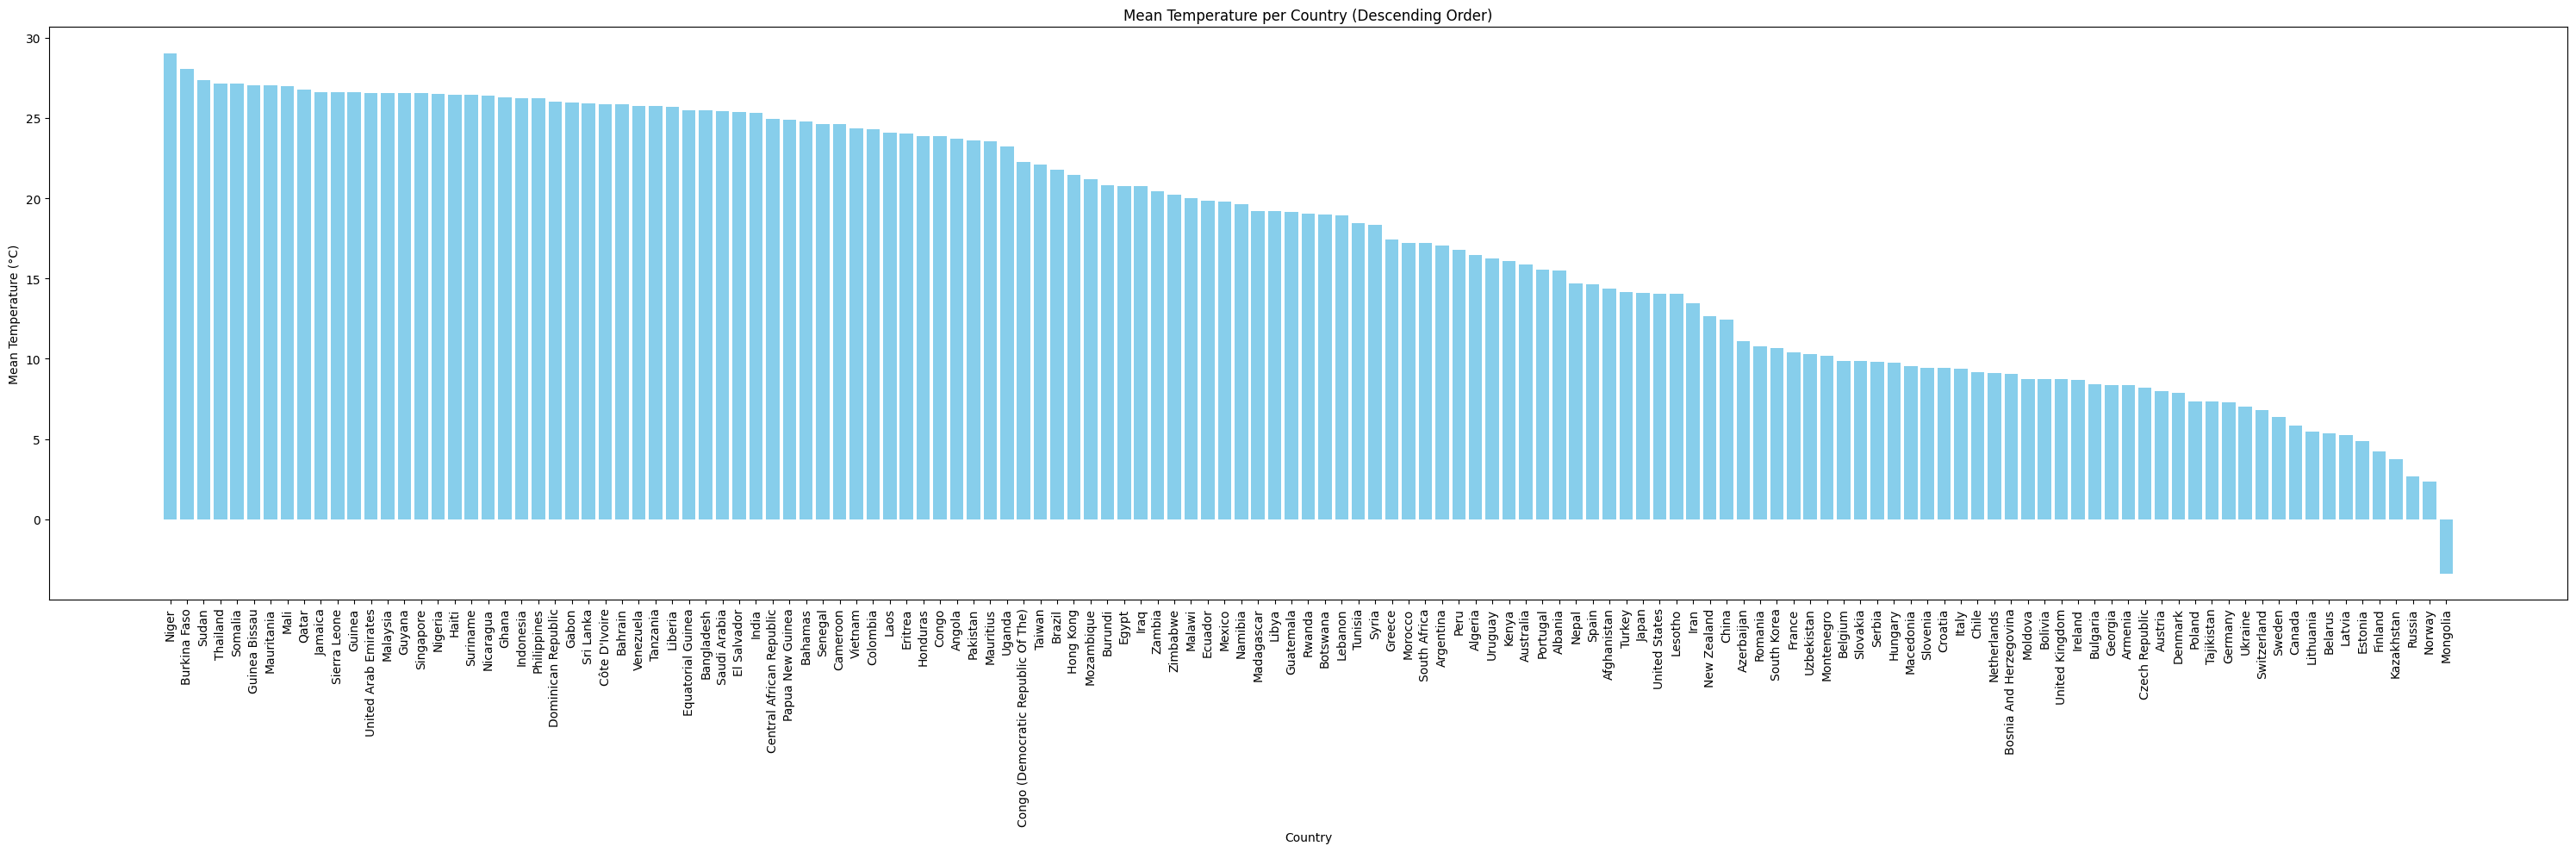

In [ ]:
# Plotting for bar table
plt.figure(figsize=(30, 10))
plt.bar(mean_temp_per_country_sorted['country'], mean_temp_per_country_sorted['avg_temp'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Mean Temperature (°C)')
plt.title('Mean Temperature per Country (Descending Order)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

## **2.4 Verify Quality**

From here we will start to have a preliminary overview of how our datasets look like. This process will be done as below :


*   Examine missing values
*   Examine duplicated rows

Since we have 5 different sets of CSV files let's go through the steps one by one.

**1. yield_df.csv**

In [ ]:
#Examine missing values
yield_df_1.isnull().sum()

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [ ]:
#Examine duplicated rows
yield_df_1.duplicated().sum()

0

**2. yield.csv**

In [ ]:
#Examine missing values
yield_df_2.isnull().sum()

Domain Code     0
Domain          0
Area Code       0
Area            0
Element Code    0
Element         0
Item Code       0
Item            0
Year Code       0
Year            0
Unit            0
Value           0
dtype: int64

In [ ]:
#Examine duplicated rows
yield_df_2.duplicated().sum()

0

**3. pesticides.csv**

In [ ]:
#Examine missing values
pesticides_df.isnull().sum()

Domain     0
Area       0
Element    0
Item       0
Year       0
Unit       0
Value      0
dtype: int64

In [ ]:
#Examine duplicated rows
pesticides_df.duplicated().sum()

0

**4. rainfall.csv**

In [ ]:
#Examine missing values
rainfall_df.isnull().sum()

 Area                              0
Year                               0
average_rain_fall_mm_per_year    774
dtype: int64

In [ ]:
#Examine duplicated rows
rainfall_df.duplicated().sum()

0

**5. temp.csv**

In [ ]:
#Examine missing values
temp_df.isnull().sum()

year           0
country        0
avg_temp    2547
dtype: int64

In [ ]:
#Examine duplicated rows
temp_df.duplicated().sum()

6958

## **2.5 Conclusion**


After going through the processes, few key takeaways that we can get from the dataset available :


1. Dependent variable can be identified as the yield field of the dataset. However this field has duplication in 2 of the files (yield_df.csv & yield.csv) hence data merging is necessary. We will need to merge these files and eliminate any duplicative columns or data.
2. There are abundance of independent variables available in the dataset that we can explore ie. areas, product items, temperature etc.  However, narrowing down the variables and only select necessary data would be advisable to focus on our project's objective.
3.   Abundance of columns that are deemed unnecessary for the study are visible ie. Unnamed, Area Code, Domain, Domain code, Element Code, Element etc.
4.   Missing values and duplicated data are prominent especially for rainfall.csv and temp.csv files
5.   Data merging, filteration and cleanups are necessary for us to go further on our study




# **3. Data preparation**




## **3.1 Data cleaning**

**1. yield.csv**

- remove unnecessary columns like Area Code, Domain, Domain code, Element
Code, Element, Item Code, Year Code
- rename Value to hg/ha_yield column

In [ ]:
#View 1st 5 rows record of yield.csv
yield_df_2.head()

Domain Code Domain  Area Code         Area  Element Code Element  Item Code  \
0          QC  Crops          2  Afghanistan          5419   Yield         56   
1          QC  Crops          2  Afghanistan          5419   Yield         56   
2          QC  Crops          2  Afghanistan          5419   Yield         56   
3          QC  Crops          2  Afghanistan          5419   Yield         56   
4          QC  Crops          2  Afghanistan          5419   Yield         56   

    Item  Year Code  Year   Unit  Value  
0  Maize       1961  1961  hg/ha  14000  
1  Maize       1962  1962  hg/ha  14000  
2  Maize       1963  1963  hg/ha  14260  
3  Maize       1964  1964  hg/ha  14257  
4  Maize       1965  1965  hg/ha  14400

In [ ]:
# rename Value to hg/ha_yield columns.
yield_df_2 = yield_df_2.rename(index=str, columns={"Value": "hg/ha_yield"})
yield_df_2.head()

Domain Code Domain  Area Code         Area  Element Code Element  Item Code  \
0          QC  Crops          2  Afghanistan          5419   Yield         56   
1          QC  Crops          2  Afghanistan          5419   Yield         56   
2          QC  Crops          2  Afghanistan          5419   Yield         56   
3          QC  Crops          2  Afghanistan          5419   Yield         56   
4          QC  Crops          2  Afghanistan          5419   Yield         56   

    Item  Year Code  Year   Unit  hg/ha_yield  
0  Maize       1961  1961  hg/ha        14000  
1  Maize       1962  1962  hg/ha        14000  
2  Maize       1963  1963  hg/ha        14260  
3  Maize       1964  1964  hg/ha        14257  
4  Maize       1965  1965  hg/ha        14400

In [ ]:
#removal of unnecessary coloumns like Area Code, Domain, Item Code, etc.
yield_df_2 = yield_df_2.drop(['Domain Code','Domain','Area Code','Element Code','Element','Item Code','Year Code','Unit',], axis=1)
yield_df_2.head()

Area   Item  Year  hg/ha_yield
0  Afghanistan  Maize  1961        14000
1  Afghanistan  Maize  1962        14000
2  Afghanistan  Maize  1963        14260
3  Afghanistan  Maize  1964        14257
4  Afghanistan  Maize  1965        14400

In [ ]:
yield_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56717 entries, 0 to 56716
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Area         56717 non-null  object
 1   Item         56717 non-null  object
 2   Year         56717 non-null  int64 
 3   hg/ha_yield  56717 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
yield_df_2['Item'].value_counts()

Maize                   8631
Potatoes                7876
Rice, paddy             6469
Sweet potatoes          6356
Wheat                   6160
Cassava                 5718
Sorghum                 5511
Soybeans                4192
Yams                    3150
Plantains and others    2654
Name: Item, dtype: int64

In [ ]:
# Dropping 'Plantains and others'as it may be any number of distinct crops
yield_df_2 = yield_df_2[yield_df_2['Item'] != 'Plantains and others']
yield_df_2['Item'].value_counts()

Maize             8631
Potatoes          7876
Rice, paddy       6469
Sweet potatoes    6356
Wheat             6160
Cassava           5718
Sorghum           5511
Soybeans          4192
Yams              3150
Name: Item, dtype: int64

**2. rainfall.csv**
- Drop empty rows from dataset

In [ ]:
#View 1st 5 rows record of rainfall.csv
rainfall_df.head()

Area  Year average_rain_fall_mm_per_year
0  Afghanistan  1985                           327
1  Afghanistan  1986                           327
2  Afghanistan  1987                           327
3  Afghanistan  1989                           327
4  Afghanistan  1990                           327

In [ ]:
# check data types
rainfall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0    Area                          6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 157.8+ KB


In [ ]:
# convert average_rain_fall_mm_per_year from object to float
rainfall_df['average_rain_fall_mm_per_year'] = pd.to_numeric(rainfall_df['average_rain_fall_mm_per_year'],errors = 'coerce')

#change Area column name without spacing
rainfall_df = rainfall_df.rename(index=str, columns={" Area": 'Area'})

In [ ]:
#droping any empty rows from dataset
rainfall_df = rainfall_df.dropna()
rainfall_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5947 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           5947 non-null   object 
 1   Year                           5947 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 185.8+ KB


In [ ]:
rainfall_df.head()

Area  Year  average_rain_fall_mm_per_year
0  Afghanistan  1985                          327.0
1  Afghanistan  1986                          327.0
2  Afghanistan  1987                          327.0
3  Afghanistan  1989                          327.0
4  Afghanistan  1990                          327.0

**3. pesticide.csv**
- Rename Values columns to pesticides_tonnes
- Drop unnecessary columns

In [ ]:
pesticides_df.head()

Domain     Area Element                Item  Year                          Unit  Value
0  Pesticides Use  Albania     Use  Pesticides (total)  1990  tonnes of active ingredients  121.0
1  Pesticides Use  Albania     Use  Pesticides (total)  1991  tonnes of active ingredients  121.0
2  Pesticides Use  Albania     Use  Pesticides (total)  1992  tonnes of active ingredients  121.0
3  Pesticides Use  Albania     Use  Pesticides (total)  1993  tonnes of active ingredients  121.0
4  Pesticides Use  Albania     Use  Pesticides (total)  1994  tonnes of active ingredients  201.0

In [ ]:
pesticides_df = pesticides_df.rename(index=str, columns={"Value": "pesticides_tonnes"})


In [ ]:
pesticides_df = pesticides_df.drop(['Element','Domain','Unit','Item'], axis=1)
pesticides_df.head()

Area  Year  Value
0  Albania  1990  121.0
1  Albania  1991  121.0
2  Albania  1992  121.0
3  Albania  1993  121.0
4  Albania  1994  201.0

In [ ]:
pesticides_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               4349 non-null   object 
 1   Year               4349 non-null   int64  
 2   pesticides_tonnes  4349 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 135.9+ KB


**4. temp.csv**
- Rename year & country columns to Year & Area
- Drop empty rows

In [ ]:
temp_df.head()

year        country  avg_temp
0  1849  Côte D'Ivoire     25.58
1  1850  Côte D'Ivoire     25.52
2  1851  Côte D'Ivoire     25.67
3  1852  Côte D'Ivoire       NaN
4  1853  Côte D'Ivoire       NaN

In [ ]:
temp_df = temp_df.rename(index=str, columns={"year": "Year", "country": "Area"})
temp_df= temp_df.dropna()
temp_df.head()


Year           Area  avg_temp
0  1849  Côte D'Ivoire     25.58
1  1850  Côte D'Ivoire     25.52
2  1851  Côte D'Ivoire     25.67
7  1856  Côte D'Ivoire     26.28
8  1857  Côte D'Ivoire     25.17

In [ ]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68764 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      68764 non-null  int64  
 1   Area      68764 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ MB


## **3.2 Merge dataframe**

In [ ]:
# merge yield dataframe with rainfall dataframe by year and area columns , forming total yield dataframe
totalyield_df = pd.merge(yield_df_2, rainfall_df, on=['Year','Area'])
#we view the final shape of the dataframe
totalyield_df.shape


(24307, 5)

In [ ]:
#1st 5 records row of totalyield_df
totalyield_df.head()

Area         Item  Year  hg/ha_yield  average_rain_fall_mm_per_year
0  Afghanistan        Maize  1985        16652                          327.0
1  Afghanistan     Potatoes  1985       140909                          327.0
2  Afghanistan  Rice, paddy  1985        22482                          327.0
3  Afghanistan        Wheat  1985        12277                          327.0
4  Afghanistan        Maize  1986        16875                          327.0

In [ ]:
# merge Pesticides dataframe with total yield dataframe
totalyield_df = pd.merge(totalyield_df,pesticides_df, on=['Year','Area'])
totalyield_df .shape


(18266, 6)

In [ ]:
#1st 5 records row of totalyield_df
totalyield_df .head()

Area         Item  Year  hg/ha_yield  average_rain_fall_mm_per_year  pesticides_tonnes
0  Albania        Maize  1990        36613                         1485.0              121.0
1  Albania     Potatoes  1990        66667                         1485.0              121.0
2  Albania  Rice, paddy  1990        23333                         1485.0              121.0
3  Albania      Sorghum  1990        12500                         1485.0              121.0
4  Albania     Soybeans  1990         7000                         1485.0              121.0

In [ ]:
# merge Temperature dataframe with total yield dataframe
totalyield_df = pd.merge(totalyield_df,temp_df, on=['Area','Year'])
#1st 5 records row of totalyield_df
totalyield_df.head()

Area         Item  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
0  Albania        Maize  1990        36613                         1485.0   
1  Albania     Potatoes  1990        66667                         1485.0   
2  Albania  Rice, paddy  1990        23333                         1485.0   
3  Albania      Sorghum  1990        12500                         1485.0   
4  Albania     Soybeans  1990         7000                         1485.0   

   Value  avg_temp  
0  121.0     16.37  
1  121.0     16.37  
2  121.0     16.37  
3  121.0     16.37  
4  121.0     16.37

In [ ]:
totalyield_df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
Value                            0
avg_temp                         0
dtype: int64

**totalyield_df is the final obtained dataframe without empty rows.**

In [ ]:
totalyield_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27686 entries, 0 to 27685
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           27686 non-null  object 
 1   Item                           27686 non-null  object 
 2   Year                           27686 non-null  int64  
 3   hg/ha_yield                    27686 non-null  int64  
 4   average_rain_fall_mm_per_year  27686 non-null  float64
 5   pesticides_tonnes              27686 non-null  float64
 6   avg_temp                       27686 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.7+ MB


## **3.3 Outlier**

In [ ]:
#summary
totalyield_df.describe()

Year    hg/ha_yield  average_rain_fall_mm_per_year  pesticides_tonnes      avg_temp
count  27686.000000   27686.000000                   27686.000000       27686.000000  27686.000000
mean    2001.545041   76471.185112                    1134.900491       37662.227559     20.468303
std        7.051131   85094.478221                     704.475099       60365.056452      6.333762
min     1990.000000      50.000000                      51.000000           0.040000      1.300000
25%     1995.000000   19594.000000                     591.000000        1795.940000     16.640000
50%     2001.000000   37202.000000                    1083.000000       18131.000000     21.450000
75%     2008.000000  104002.000000                    1668.000000       49157.000000     25.960000
max     2013.000000  501412.000000                    3240.000000      367778.000000     30.650000

**High variance in the values for each columns in total yield dataframe**




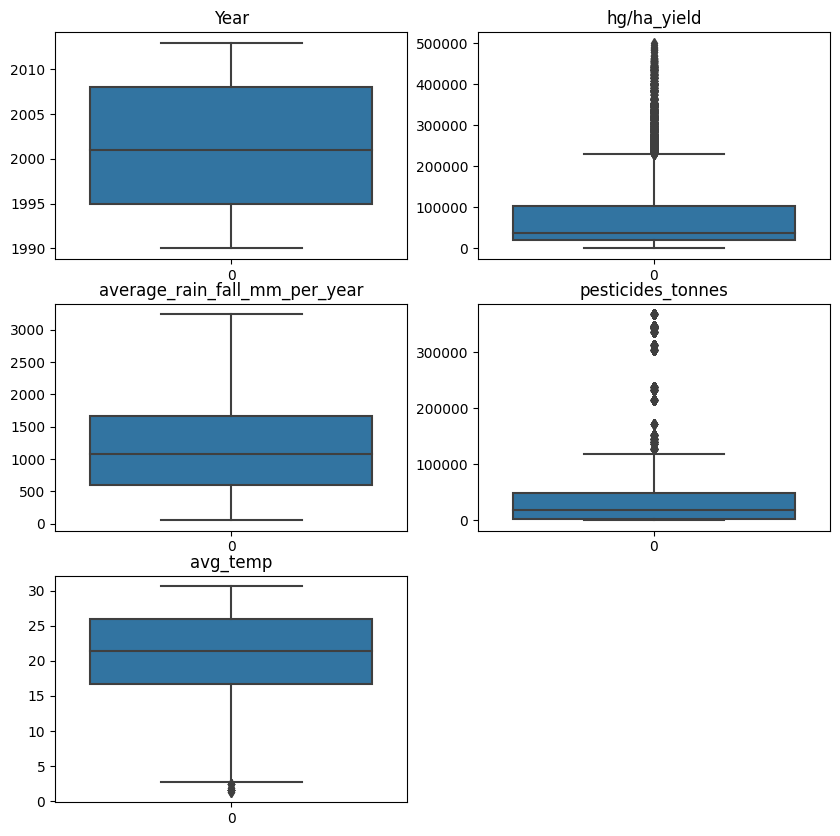

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,10))

plt.subplot(3,2,1)
sns.boxplot(data= totalyield_df['Year'])
plt.title('Year')


plt.subplot(3,2,2)
sns.boxplot(data= totalyield_df['hg/ha_yield'])
plt.title('hg/ha_yield')

plt.subplot(3,2,3)
sns.boxplot(data= totalyield_df['average_rain_fall_mm_per_year'])
plt.title('average_rain_fall_mm_per_year')

plt.subplot(3,2,4)
sns.boxplot(data= totalyield_df['pesticides_tonnes'])
plt.title('pesticides_tonnes')

plt.subplot(3,2,5)
sns.boxplot(data= totalyield_df['avg_temp'])
plt.title('avg_temp')

plt.show()

*   rainfall: Most rainfall is between 500-1500
*   avg_temp: Most average temperatures is around 25. *hg/ha yield: There is a vast majority of yield production around 0.
*   pesticides_tonnes: The majority of used pesticides is little to zero
*   **There are large outliers in the hg/ha_yield and pesticides_tonnes columns.**

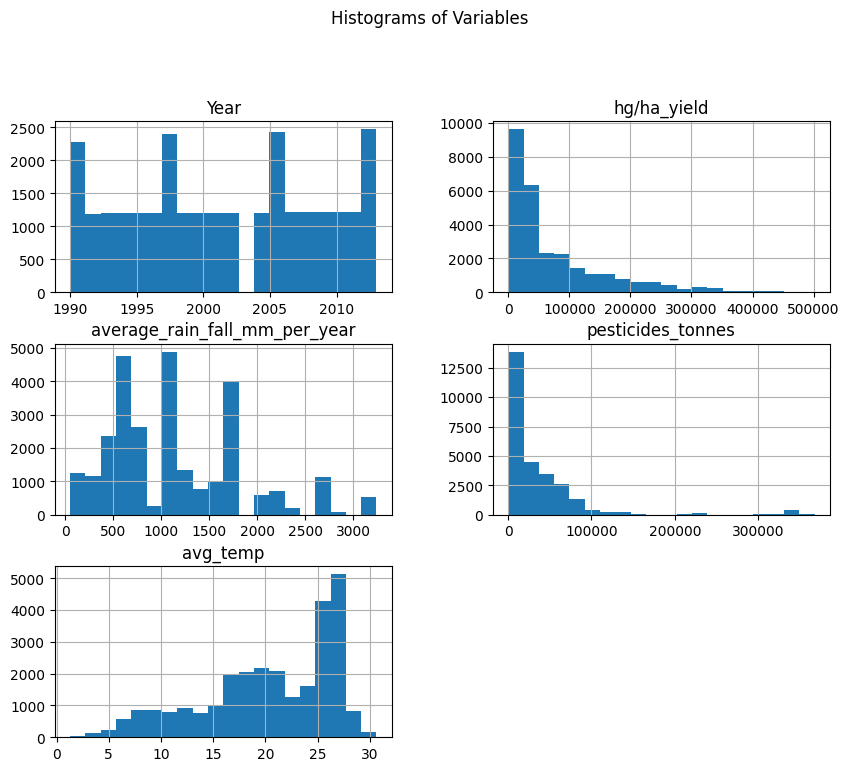

In [ ]:
# Plot histograms for each variable
totalyield_df.hist(bins=20, figsize=(10, 8))
plt.suptitle('Histograms of Variables', x=0.5, y=1.02, ha='center', fontsize='large')
plt.show()

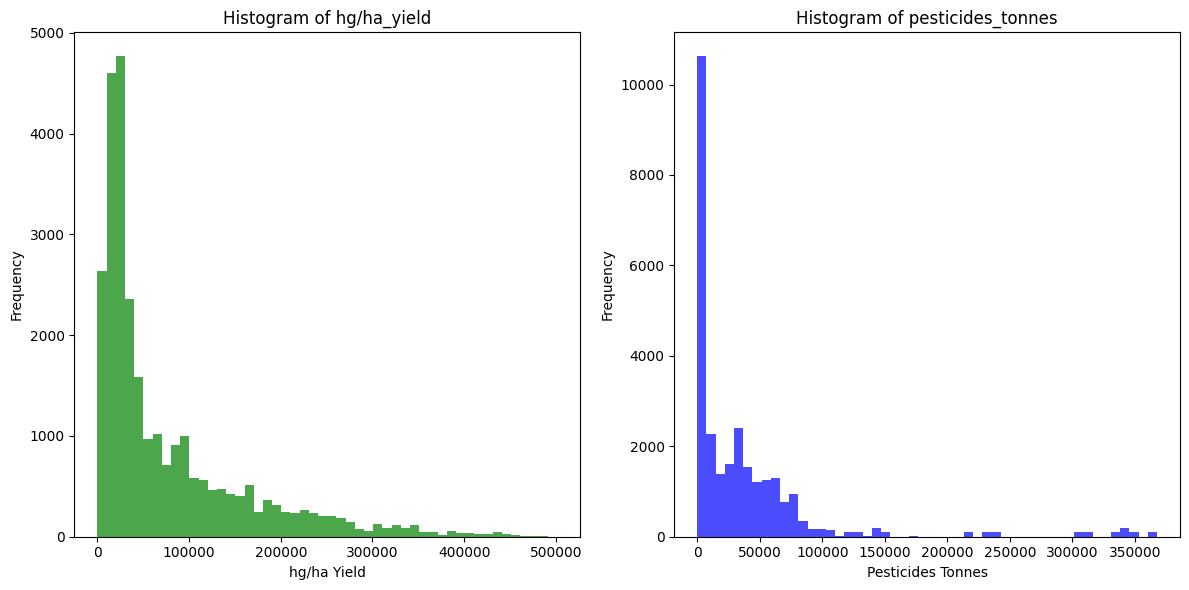

In [ ]:
# Plot histograms only for 'hg/ha_yield' and 'pesticides_tonnes'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.hist(totalyield_df['pesticides_tonnes'], bins=50, color='blue', alpha=0.7)
plt.title('Histogram of pesticides_tonnes')
plt.xlabel('Pesticides Tonnes')
plt.ylabel('Frequency')

plt.subplot(1, 2, 1)
plt.hist(totalyield_df['hg/ha_yield'], bins=50, color='green', alpha=0.7)
plt.title('Histogram of hg/ha_yield')
plt.xlabel('hg/ha Yield')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

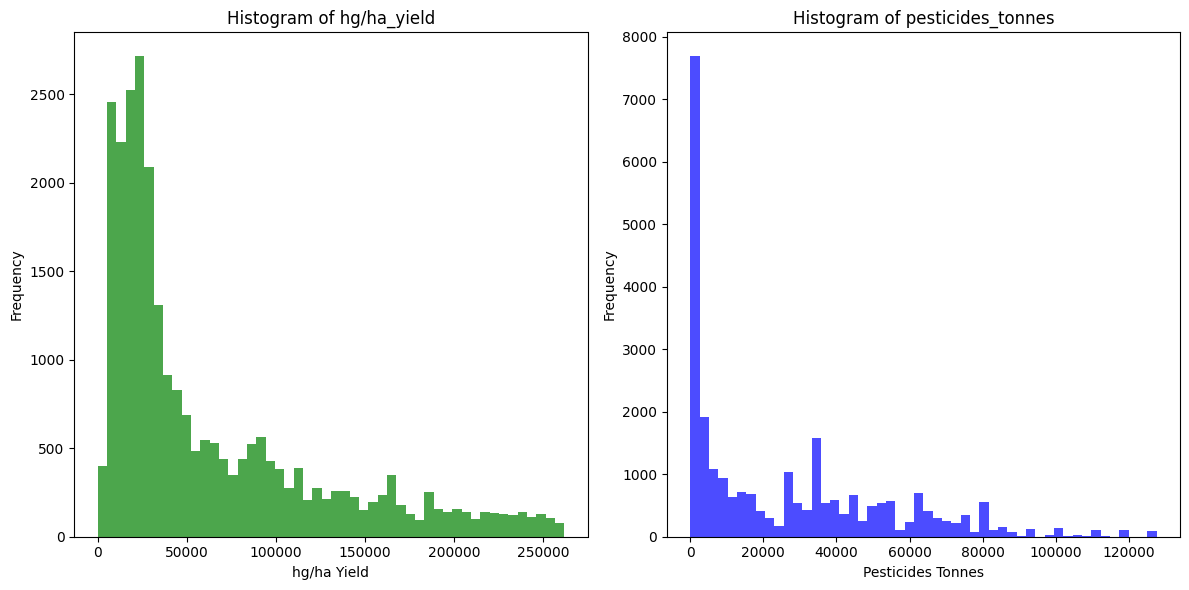

In [ ]:
# Filter based on 'pesticides_tonnes'( keeping only 95th quantile)
pesticides_subset = totalyield_df['pesticides_tonnes'][totalyield_df['pesticides_tonnes'] <= totalyield_df['pesticides_tonnes'].quantile(0.95)]
# Filter based on 'hg/ha_yield' ( keeping only 95th quantile)
yield_subset = totalyield_df['hg/ha_yield'][totalyield_df['hg/ha_yield'] <= totalyield_df['hg/ha_yield'].quantile(0.95)]

# Plot histograms for 'hg/ha_yield' and 'pesticides_tonnes'(To check if the data distribution is the same after keeping only 95th quantile)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
plt.hist(pesticides_subset, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of pesticides_tonnes')
plt.xlabel('Pesticides Tonnes')
plt.ylabel('Frequency')

plt.subplot(1, 2, 1)
plt.hist(yield_subset, bins=50, color='green', alpha=0.7)
plt.title('Histogram of hg/ha_yield')
plt.xlabel('hg/ha Yield')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Same data distrubtion after keeping only 95th quantile**

In [ ]:
#To drop only the upper 5% data points to prevent high variance in the data set.
totalyield_df = totalyield_df[(totalyield_df['pesticides_tonnes'] <= totalyield_df['pesticides_tonnes'].quantile(0.95)) &
                              (totalyield_df['hg/ha_yield'] <= totalyield_df['hg/ha_yield'].quantile(0.95))]

## **3.4 Data Exploration**


In [ ]:
#number of records for each column , group by iteam
totalyield_df.groupby('Item').count()

Area  Year  hg/ha_yield  average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp
Item                                                                                               
Cassava         1609  1609         1609                           1609               1609      1609
Maize           3974  3974         3974                           3974               3974      3974
Potatoes        3189  3189         3189                           3189               3189      3189
Rice, paddy     3241  3241         3241                           3241               3241      3241
Sorghum         2892  2892         2892                           2892               2892      2892
Soybeans        3076  3076         3076                           3076               3076      3076
Sweet potatoes  2624  2624         2624                           2624               2624      2624
Wheat           3710  3710         3710                           3710               3710      3710
Yams             704   704          704                            704                704       704

In [ ]:
#number of country (area)
country_counts=totalyield_df['Area'].nunique()
print(f'Number of countries: {country_counts}')

Number of countries: 101


In [ ]:
# Count the number of countries with less than 100 records
country_counts1 = totalyield_df['Area'].value_counts()
countries_less_than_100 = (country_counts1 < 100).sum()
print(f'Number of countries with less than 100 records: {countries_less_than_100}')

Number of countries with less than 100 records: 31


In [ ]:
# Remove countries with less than 100 record
country_counts =totalyield_df['Area'].value_counts()
countries_to_drop = country_counts[country_counts < 100].index.tolist()
df_filtered = totalyield_df[~totalyield_df['Area'].isin(countries_to_drop)]
totalyield_df_2= df_filtered.reset_index(drop=True)


In [ ]:
#check for corelation
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Heatmap')

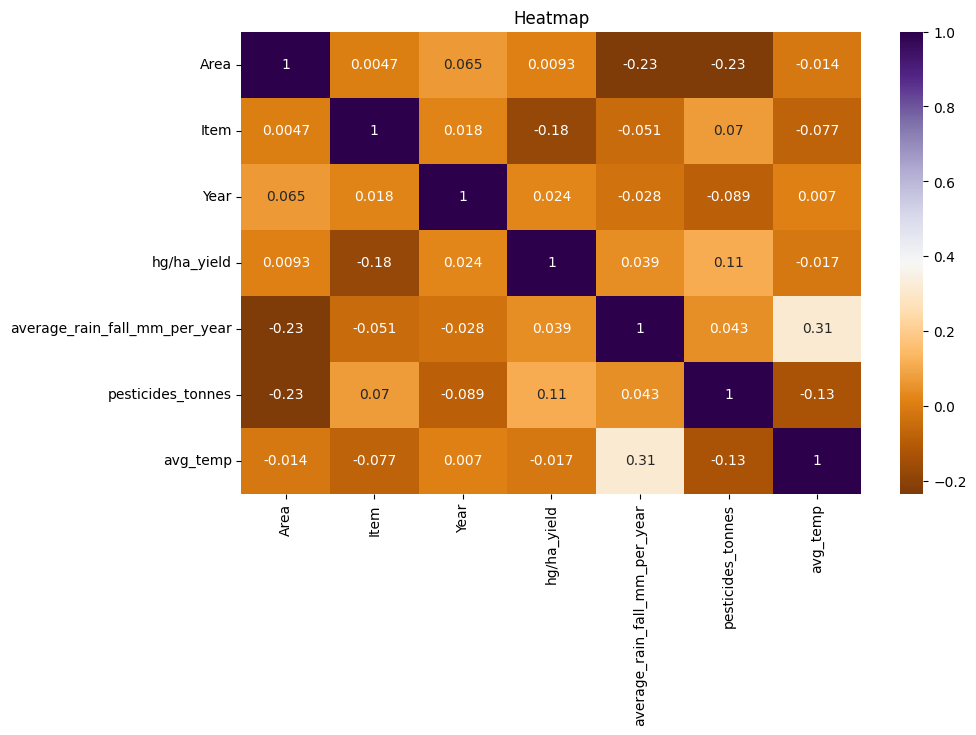

In [ ]:
datacorr=totalyield_df_2.copy()

from sklearn.preprocessing import LabelEncoder
categorical_columns = datacorr.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
for column in categorical_columns:
    datacorr[column] = label_encoder.fit_transform(datacorr[column])

sns.heatmap(datacorr.corr() , annot= True , cmap='PuOr')
plt.title('Heatmap')



*   There are correlation between Area and pesticides_tonnes, followed by Area and average rainfall
*   There are correlation between Item and hg/ha_yield




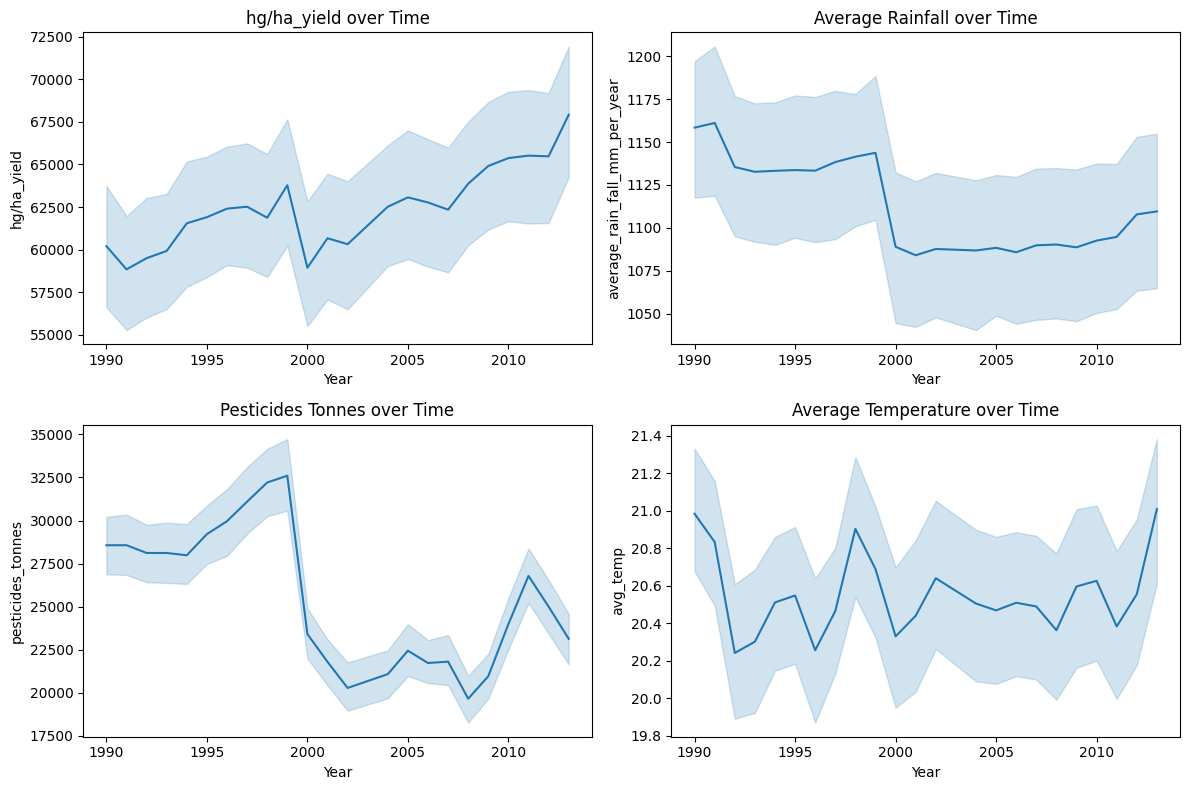

In [ ]:
# Select relevant columns
selected_columns = ['Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
selected_df = totalyield_df[selected_columns]

# Set 'Year' as the index
selected_df.set_index('Year', inplace=True)

# Plot line charts for each variable
plt.figure(figsize=(12, 8))

# Line plot for 'hg/ha_yield'
plt.subplot(2, 2, 1)
sns.lineplot(data=selected_df['hg/ha_yield'])
plt.title('hg/ha_yield over Time')
# Line plot for 'average_rain_fall_mm_per_year'
plt.subplot(2, 2, 2)
sns.lineplot(data=selected_df['average_rain_fall_mm_per_year'])
plt.title('Average Rainfall over Time')
# Line plot for 'pesticides_tonnes'
plt.subplot(2, 2, 3)
sns.lineplot(data=selected_df['pesticides_tonnes'])
plt.title('Pesticides Tonnes over Time')
# Line plot for 'avg_temp'
plt.subplot(2, 2, 4)
sns.lineplot(data=selected_df['avg_temp'])
plt.title('Average Temperature over Time')

plt.tight_layout()
plt.show()

*   The yield and pesticides used increases graduallly over time

<Figure size 1400x800 with 0 Axes>

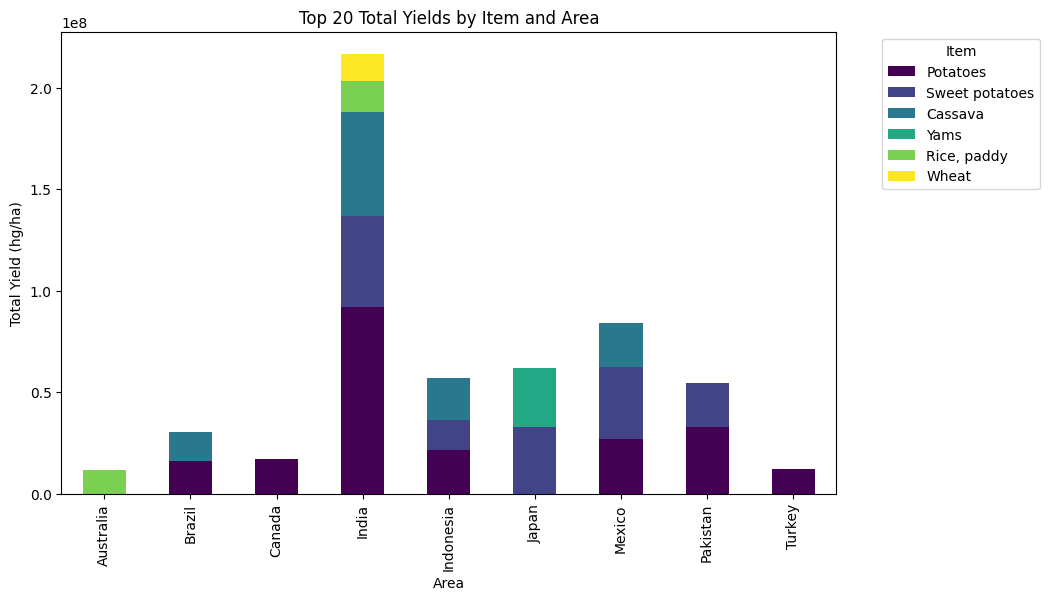

In [ ]:
# Group by 'Item' and 'Area', sum the 'hg/ha_yield', then select the top 20
top_20_items_areas = totalyield_df.groupby(['Item', 'Area'], sort=True)['hg/ha_yield'].sum().nlargest(20)

# Reshape the data for plotting
pivot_table = top_20_items_areas.unstack('Item', fill_value=0)

# Sort the columns in descending order based on the sum of each column
pivot_table = pivot_table[pivot_table.sum().sort_values(ascending=False).index]

# Plot a grouped bar chart
plt.figure(figsize=(14, 8))
pivot_table.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Top 20 Total Yields by Item and Area')
plt.xlabel('Area')
plt.ylabel('Total Yield (hg/ha)')
plt.legend(title='Item', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**India is the country producing the highest yield out of 71 country, producing cassava,sweet potates and potates**

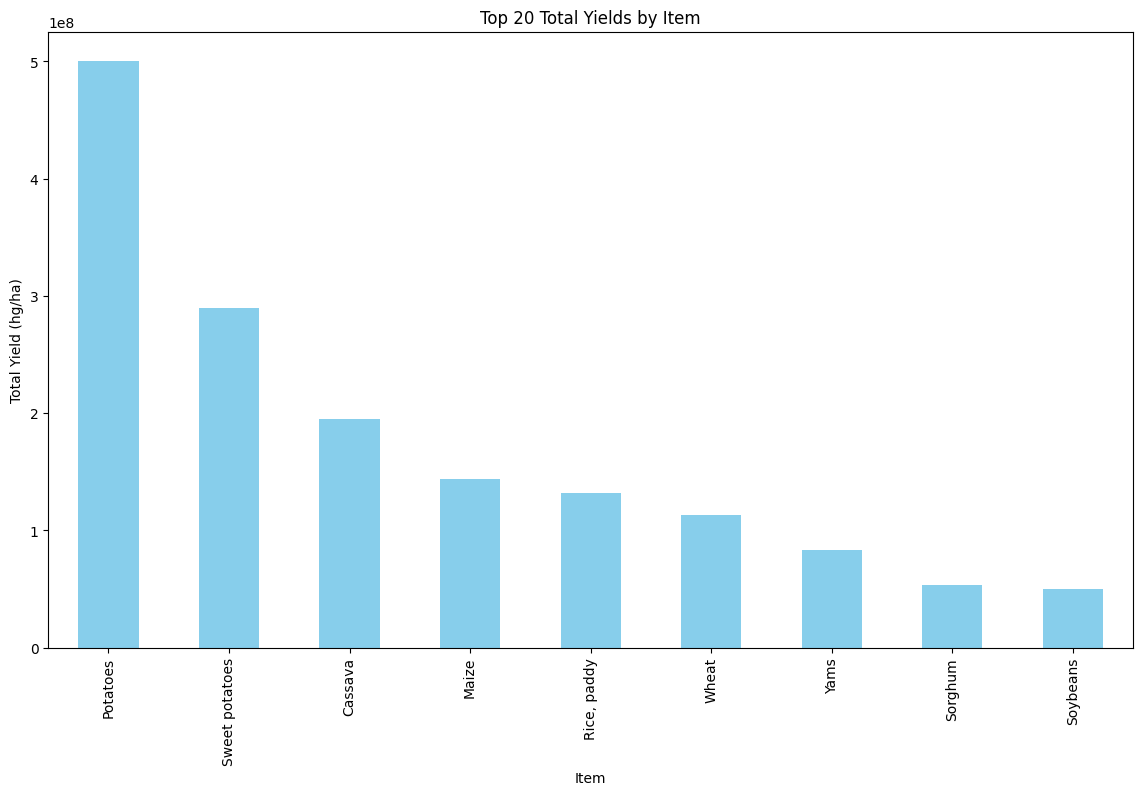

In [ ]:
# Group by 'Item' and 'Area', sum the 'hg/ha_yield', then select the top 20
top_20_items = totalyield_df.groupby('Item', sort=True)['hg/ha_yield'].sum().nlargest(20)

# Plot a bar chart for 'Item' and 'hg/ha_yield'
plt.figure(figsize=(14, 8))
top_20_items.plot(kind='bar', color='skyblue')
plt.title('Top 20 Total Yields by Item')
plt.xlabel('Item')
plt.ylabel('Total Yield (hg/ha)')
plt.show()


**Potatoes are the crops with the highest yield worldwide from 1990 to 2013**

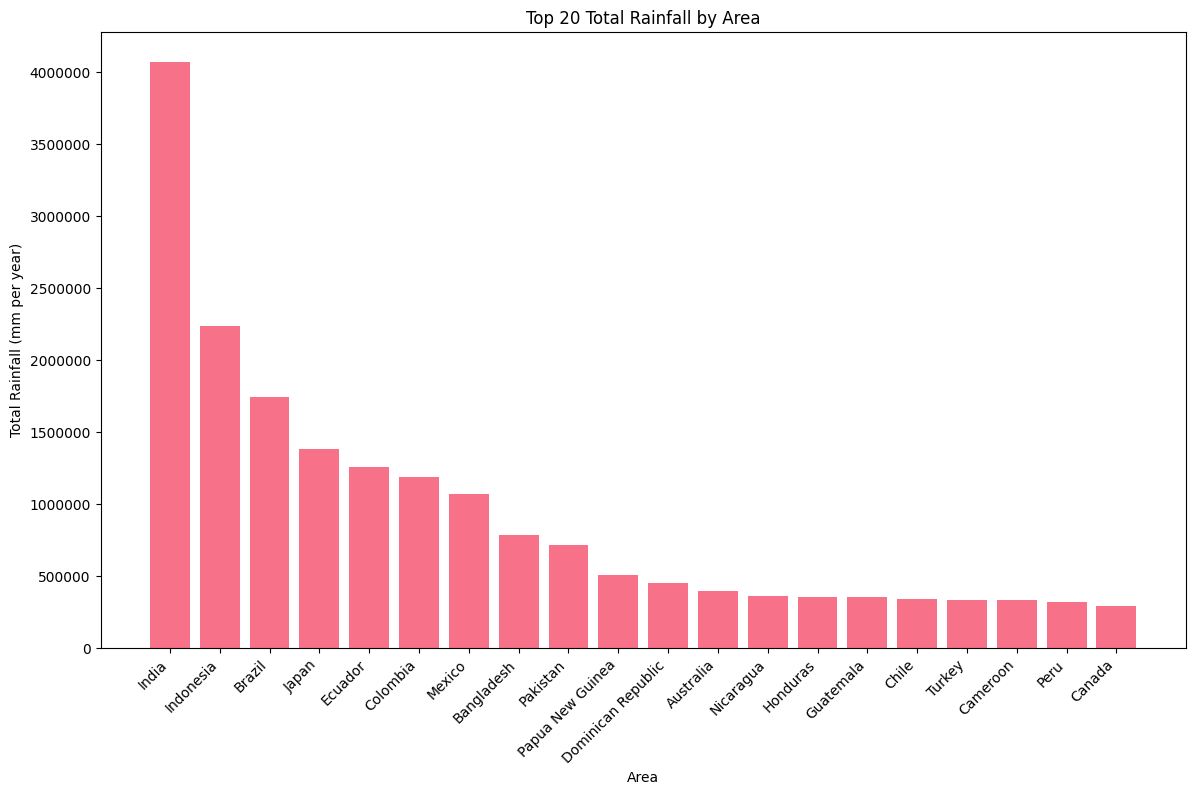

In [ ]:
import seaborn as sns  # Import seaborn for color palettes

# Group by 'Area', calculate the sum of 'average_rain_fall_mm_per_year' for each area
top_20_areas_rainfall = totalyield_df.groupby('Area')['average_rain_fall_mm_per_year'].sum().nlargest(20)

plot_df = pd.DataFrame({'Area': top_20_areas_rainfall.index, 'Total Rainfall (mm per year)': top_20_areas_rainfall.values})

sns.set_palette('husl')

# Plot a bar chart
plt.figure(figsize=(14, 8))
plt.bar(plot_df['Area'], plot_df['Total Rainfall (mm per year)'])
plt.title('Top 20 Total Rainfall by Area')
plt.xlabel('Area')
plt.ylabel('Total Rainfall (mm per year)')
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.show()


**Top 3 country with the highest amount of rainfall are India, Brazil and Indonesia**

In [ ]:
import plotly.express as px
areas_of_interest = ['Brazil', 'India', 'Indonesia']
# Filter DataFrame for the specified areas
df_subset = totalyield_df[totalyield_df['Area'].isin(areas_of_interest)]

# Create scatter plot
scatter = px.scatter(df_subset, x='hg/ha_yield', y='average_rain_fall_mm_per_year', color='Area',
                     color_discrete_sequence=px.colors.qualitative.Set1, size_max=12)
scatter.update_layout(title=f'Scatter Plots for {", ".join(areas_of_interest)}',
                      xaxis_title='hg/ha_yield', yaxis_title='average_rain_fall_mm_per_year')
scatter.update_xaxes(tickmode='linear', tick0=0, dtick=5000)  # You can adjust the dtick value as needed

scatter.show()



*   Among Top 3 country with the highest amount of rainfallList, India has the highest yield production is 385k hg/ha




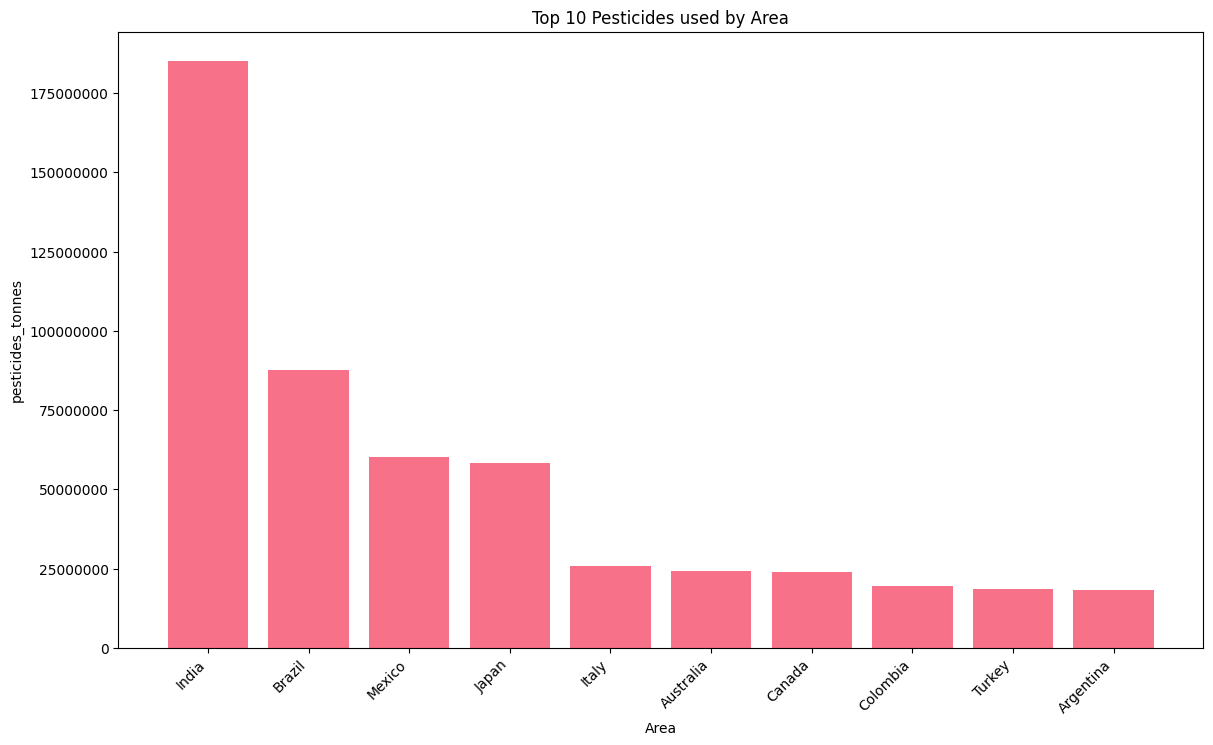

In [ ]:
# Group by 'Area', calculate the sum of 'pesticides_tonnes for each area
top_10_areas_pesticides = totalyield_df.groupby('Area')['pesticides_tonnes'].sum().nlargest(10)

plot_df = pd.DataFrame({'Area': top_10_areas_pesticides.index, 'pesticides_tonnes': top_10_areas_pesticides.values})

sns.set_palette('husl')

# Plot a bar chart
plt.figure(figsize=(14, 8))
plt.bar(plot_df['Area'], plot_df['pesticides_tonnes'])
plt.title('Top 10 Pesticides used by Area')
plt.xlabel('Area')
plt.ylabel('pesticides_tonnes')
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

**Brazil used the highest amount of pesticides**

In [ ]:
import plotly.express as px

areas_of_interest = ['Brazil', 'India', 'Japan', 'Mexico', 'Australia', 'Italy', 'Argentina', 'Canada', 'Turkey', 'Colombia']

# Filter DataFrame for the specified areas
df_subset = totalyield_df[totalyield_df['Area'].isin(areas_of_interest)]

# Create scatter plot
scatter = px.scatter(df_subset, x='hg/ha_yield', y='pesticides_tonnes', color='Area',
                     color_discrete_sequence=px.colors.qualitative.Set1, size_max=12)
scatter.update_layout(title=f'Scatter Plots for {", ".join(areas_of_interest)}',
                      xaxis_title='hg/ha_yield', yaxis_title='pesticides_tonnes')

# Show the scatter plot
scatter.show()


Do pesticides affect yield production?
*   Among the Top 10 country in using pesticides, most of the country with yield production up to 400k hg/ha
*   Brazil used relatively high amount of pesticides with yield production up to 300k hg/ha


# **4. Data preprocessing**

Data preprocessing including to change the categorical value to numerical value and there're 3 methods to do so which are:
*   Label Encoding
*   One Hot Encoding
*   **Target Encoding**

The columns that required for pre-processing are Area and Item. Both are categorical value and it's not ordinal.

**Since it's not ordinal, Label Encoding is not suitable.**






We can't use One Hot Encoding also because:

For Area, we have a total of 101 unique Area. This will create additional 101 columns.

For Item, we have a total of 10 unique Item. This will create additional 10 columns.

Total additional columns will be 101 + 10 = 111 columns.

An increase in the dimensionality of the dataset causes curses of dimensionality, which leads to the problem of parallelism and multicollinearity.

To overcome this, there's a simple solution that can reduce the dimension which is to take only the top 5 categories that have highest frequency and these 5 categories are make up of more than 85% of the whole dataset.

However, in our dataset, the top 5 areas that have highest frequency are India 4048, Brazil 2277, Mexico 1472, Pakistan 1449, Japan 966. The other areas also have similar frequency count. Hence the top 5 categories are not make up of more than 85% of the whole dataset. Same also for column Item.

**Hence, One Hot Encoding is not suitable as well.**


In [ ]:
#check total unique count of Area & Item
unique_countA = totalyield_df['Area'].nunique()
unique_countB = totalyield_df['Item'].nunique()
print(f"Total unique count in 'Area': {unique_countA}")
print(f"Total unique count in 'Item': {unique_countB}")

Total unique count in 'Area': 101
Total unique count in 'Item': 9


In [ ]:
# Counting by Area
totalyield_df.Area.value_counts()

India                       3762
Pakistan                    1449
Mexico                      1416
Brazil                       990
Indonesia                    828
Japan                        828
Australia                    744
South Africa                 580
Turkey                       560
Ecuador                      552
Canada                       552
Spain                        450
Colombia                     368
Italy                        322
Dominican Republic           322
Morocco                      310
Argentina                    310
Bangladesh                   294
Egypt                        290
Iraq                         276
Kazakhstan                   252
Chile                        226
Kenya                        207
Cameroon                     207
Burundi                      207
Rwanda                       207
Mali                         207
Germany                      204
Madagascar                   184
Peru                         184
Uganda    

In [ ]:
# Counting by Item
totalyield_df.Item.value_counts()

Maize             3974
Wheat             3710
Rice, paddy       3241
Potatoes          3189
Soybeans          3076
Sorghum           2892
Sweet potatoes    2624
Cassava           1609
Yams               704
Name: Item, dtype: int64

**Target encoding is replacing a categorical feature with average target value of all data points belonging to the category.**

**Target Encoding is suitable for our case.**

In [ ]:
#install package
!pip install category_encoders

In [ ]:
# use target encoding
import category_encoders as ce
encoder=ce.TargetEncoder(cols=['Area','Item'])
data_en=encoder.fit_transform(totalyield_df[['Area','Item']],totalyield_df['hg/ha_yield'])
df_new = totalyield_df.drop(columns=['Area', 'Item']).join(data_en)
df_new.head(5)


Year  hg/ha_yield  average_rain_fall_mm_per_year  Value  avg_temp  \
0  1990        36613                         1485.0  121.0     16.37   
1  1990        66667                         1485.0  121.0     16.37   
2  1990        23333                         1485.0  121.0     16.37   
3  1990        12500                         1485.0  121.0     16.37   
4  1990         7000                         1485.0  121.0     16.37   

           Area           Item  
0  57699.242405   36310.070614  
1  57699.242405  199801.549579  
2  57699.242405   40730.434770  
3  57699.242405   18635.777229  
4  57699.242405   16731.092771

There's no need to do smoothing after the Target Encoding because this technique is particularly useful to handle situations when there are very few datapoints for some of the categories. In our case, datapoint is similarly many for every categories.

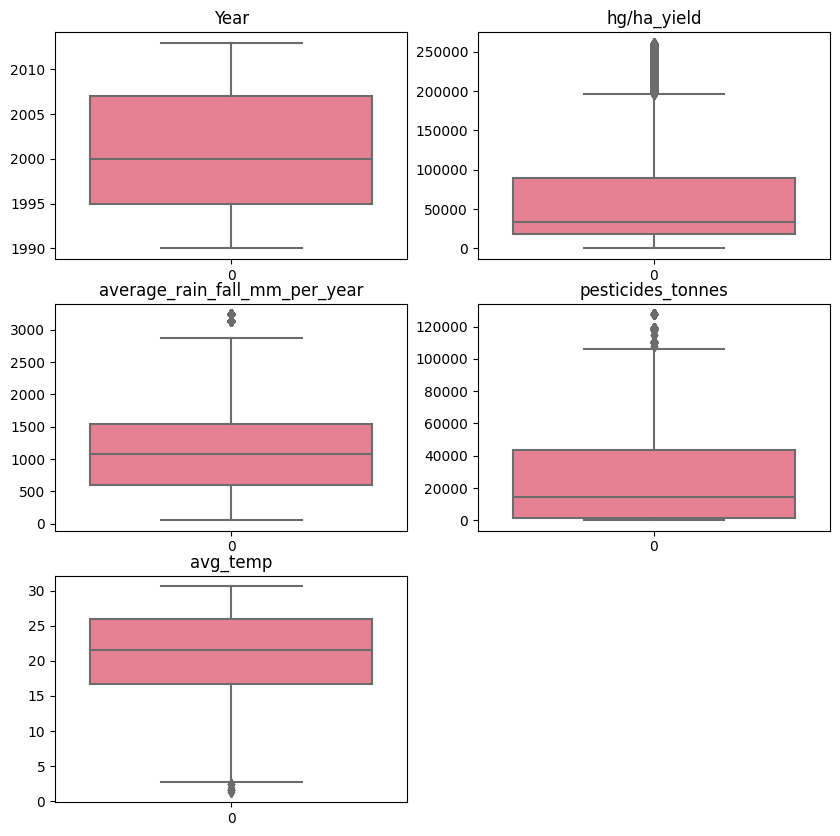

In [ ]:
plt.figure(figsize = (10,10))

plt.subplot(3,2,1)
sns.boxplot(data= df_new['Year'])
plt.title('Year')


plt.subplot(3,2,2)
sns.boxplot(data= df_new['hg/ha_yield'])
plt.title('hg/ha_yield')

plt.subplot(3,2,3)
sns.boxplot(data= df_new['average_rain_fall_mm_per_year'])
plt.title('average_rain_fall_mm_per_year')

plt.subplot(3,2,4)
sns.boxplot(data= df_new['pesticides_tonnes'])
plt.title('pesticides_tonnes')

plt.subplot(3,2,5)
sns.boxplot(data= df_new['avg_temp'])
plt.title('avg_temp')

plt.show()

# **5. Data Modelling**

## **5.1 Preparing Train and Test data**
Divide the dataset into training and test sets. The training set is used to train the model and the test set is used to evaluate the model's performance.

In [ ]:
from sklearn.metrics import root_mean_squared_error

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
X, y = df_new.drop(labels='hg/ha_yield', axis=1), df_new['hg/ha_yield']

In [ ]:
#Will split to train set and test set to 70 30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## **5.2 Modelling**
To predict the crop yield, the suitable algorithm is supervised learning: regression. The models belonging to this category are:
1.   Linear Regression
2.   Decision Tree
3.   Random Forest

The accuracy of the Linear Regression Model Train is 74.59
The accuracy of the Linear Regression Model Test is 74.62


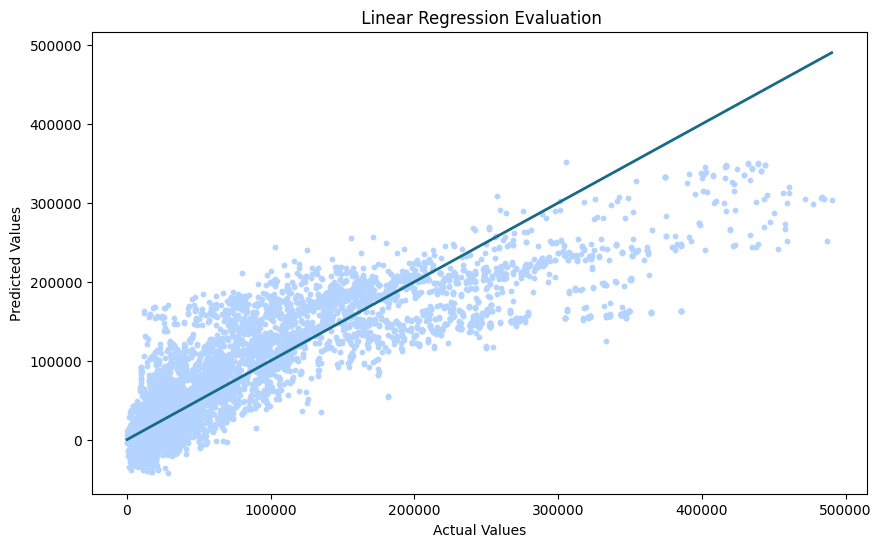

The accuracy of the Decision Tree Model Train is 100.00
The accuracy of the Decision Tree Model Test is 98.34


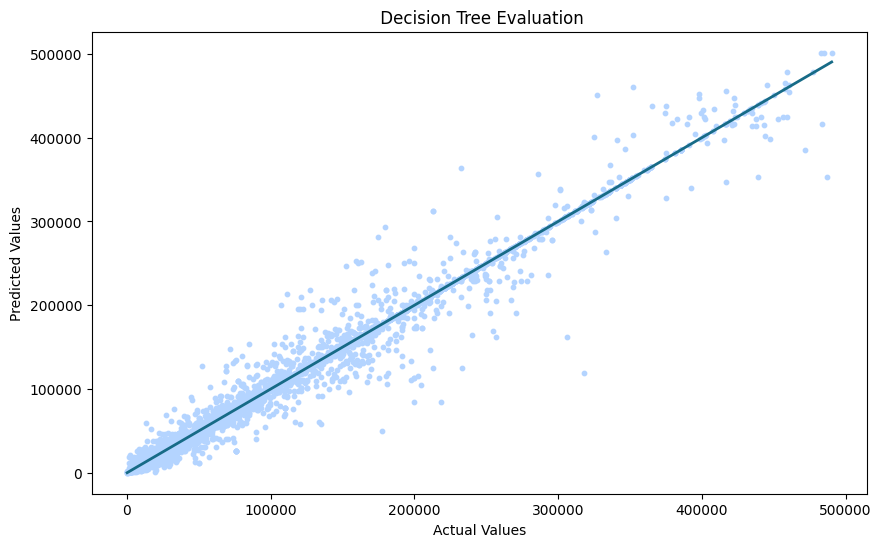

The accuracy of the Random Forest Model Train is 99.83
The accuracy of the Random Forest Model Test is 98.95


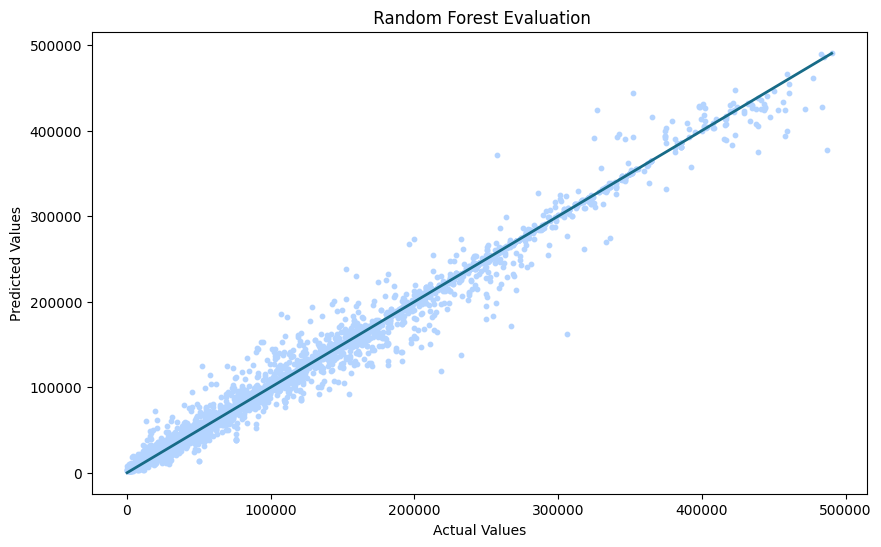

In [ ]:
results = []

models = [
    ('Linear Regression', LinearRegression()),
    #random_state 42 is set so no matter how many times you execute your code the result would be the same
    ('Decision Tree',DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42))
    ]

# print prediction results
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = root_mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, R2_score, MSE, RMSE))
    acc = (model.score(X_train , y_train)*100)
    print(f'The accuracy of the {name} Model Train is {acc:.2f}')
    acc =(model.score(X_test , y_test)*100)
    print(f'The accuracy of the {name} Model Test is {acc:.2f}')
    plt.scatter(y_test, y_pred,s=10,color='#B4D4FF')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f' {name} Evaluation')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#176B87', linewidth = 2)
    plt.show()

dff = pd.DataFrame(results, columns=['Model', 'R2_score', 'MSE', 'RMSE'])
df_styled_best = dff.style.highlight_max(subset=['R2_score'], color='#C3E2C2').highlight_min(subset=['MSE'], color='#C3E2C2').highlight_max(subset=['MSE'], color='#FFC0D9').highlight_min(subset=['RMSE'], color='#C3E2C2').highlight_max(subset=['RMSE'], color='#FFC0D9').highlight_min(subset=['R2_score'], color='#FFC0D9')

display(df_styled_best)

The model that have the best performance is Random Forest Regressor with an R2 score of 0.981266.

## **5.3 Hyperparameter Tunning**



In [ ]:
# defining parameter range
model_params={
'Linear Regression':{
	'model': LinearRegression(),
	'params':{
    'positive':[True, False]
	}
},
'Decision Tree':{
	'model': DecisionTreeRegressor(),
	'params':{
  'max_depth':[None, 5,10]
	}
},
'Random Forest':{
	'model': RandomForestRegressor(),
	'params':{
	'n_estimators':[70,100,120], #default=100 : number of trees you want to build. Higher number of trees give you better performance but makes your code slower.
	#max_features - default is Auto/None : This will simply take all the features which make sense in every tree.
	'min_samples_leaf':[1,20, 50] #default=1 : Leaf is the end node of a decision tree. A smaller leaf makes the model more prone to capturing noise in train data
	}
}
}

scores = []
for model_name, mp in model_params.items():
    # fitting the model for grid search
    grid = GridSearchCV(mp['model'],mp['params'], cv=5, return_train_score=False, refit = True, verbose = 3,n_jobs=-1)
    grid.fit(X_train, y_train)
    scores.append({
		'model':model_name,
		'best_score':grid.best_score_,
		'best_params':grid.best_params_
		})

# print best parameter after tuning
df=pd.DataFrame(scores, columns=['model','best_score','best_params'])
df


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits


model  best_score                                   best_params
0  Linear Regression    0.741448                           {'positive': False}
1      Decision Tree    0.961596                           {'max_depth': None}
2      Random Forest    0.978411  {'min_samples_leaf': 1, 'n_estimators': 100}

Even though after the hyperparameter tuning, Random Forest R2 score 0.978728 is a bit lower than before tuning 0.981266, however, it's still the best performance among 3 models.

Generally, Random Forest model is preferred due to its strong generalization and performance, allowing for efficient prediction on new data.

## **5.4 Best Model: Predicted Vs Actual**

In [ ]:
best_model=RandomForestRegressor(random_state=42)
best_model.fit(X_train,y_train)
y_pred=best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.9812659689555365


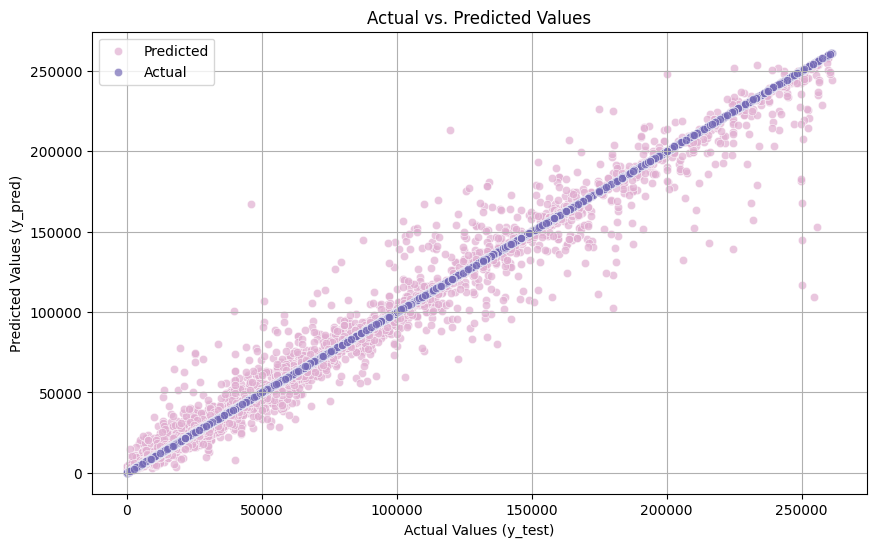

In [ ]:
#plotting the results of our model, against the original results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='#E0AED0', label='Predicted')
sns.scatterplot(x=y_test, y=y_test, alpha=0.7, color='#756AB6', label='Actual')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
plt.grid(True)
plt.legend()
plt.show()

# **6. Result Evaluation & Interpretation**

In order to evaluate the predictive performance of the machine learning models, the **Residual Plots** (scatter plot of residuals against predicted values) is plotted to identify the distribution and changing spread of residuals.
As a good residual plot,
1.   Residuals should be normally distributed, and there should be no patterns or trends.
2.   The result is not heteroscedasticity, meaning that the spread of residuals remains relatively constant across different levels of the fitted values.

Also, the metrics such as **Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), or R-squared** are calculated to assess the performance of the regression models.

*   Mean Absolute Error (MAE): average of the absolute differences between predicted and actual values.
*   Mean Squared Error (MSE): average squared difference between predicted and actual values. Higher weight represents larger error.
*   Root Mean Squared Error (RMSE): square root of the MSE and provides an interpretable measure in the same unit as the target variable.
*   R-squared (R2): proportion of the variance in the dependent variable, range from 0 to 1, where 1 indicates a perfect fit.



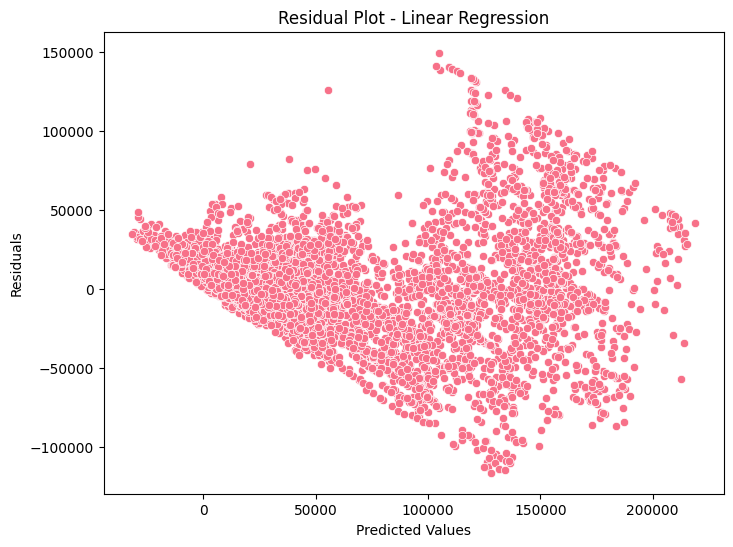

Model: Linear Regression
Mean Absolute Error (MAE): 21655.7864
Mean Squared Error (MSE): 959563064.4817
Root Mean Squared Error (RMSE): 30976.8150
R-squared (R2): 0.7478


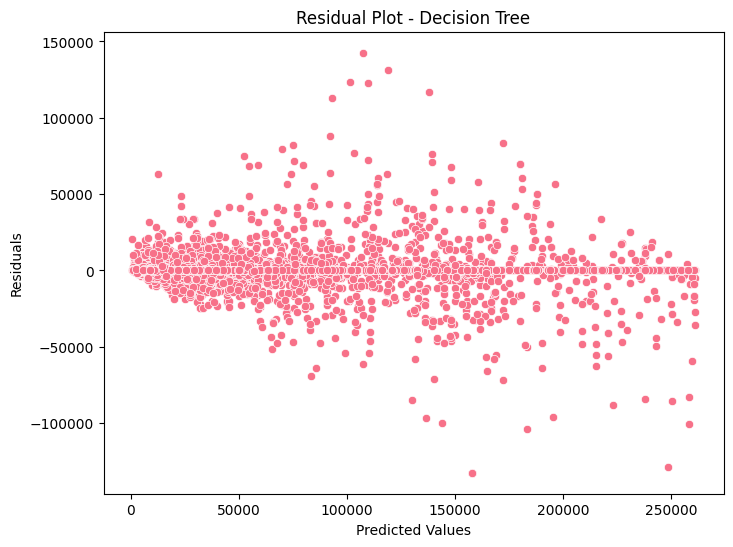

Model: Decision Tree
Mean Absolute Error (MAE): 3753.1286
Mean Squared Error (MSE): 118506692.3500
Root Mean Squared Error (RMSE): 10886.0779
R-squared (R2): 0.9689


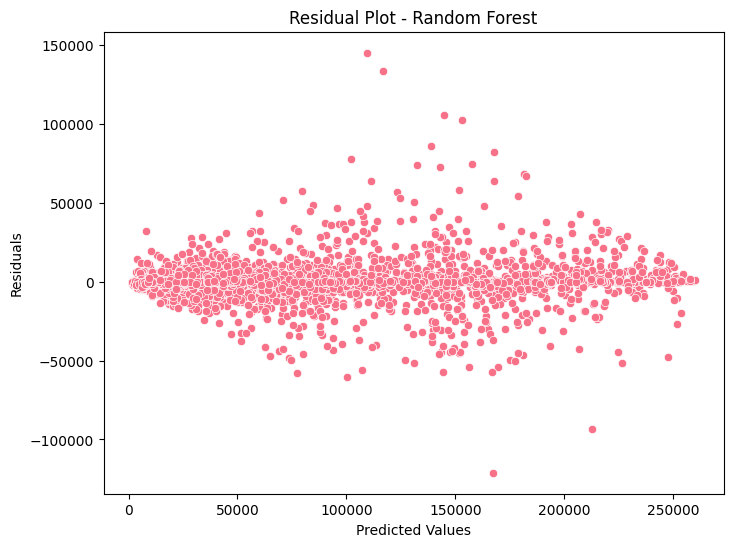

Model: Random Forest
Mean Absolute Error (MAE): 3382.0831
Mean Squared Error (MSE): 71282436.0810
Root Mean Squared Error (RMSE): 8442.8926
R-squared (R2): 0.9813


In [ ]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Decision Tree
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Gradient Boosting
#gb_model = GradientBoostingRegressor(random_state=42)
#gb_model.fit(X_train, y_train)
#y_pred_gb = gb_model.predict(X_test)

# Evaluation and Residual Plots
models = [linear_model, tree_model, rf_model]#, gb_model]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest']#, 'Gradient Boosting']

for model, model_name in zip(models, model_names):
    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Residual plot
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.title(f'Residual Plot - {model_name}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()

    # Display results
    print(f'Model: {model_name}')
    print(f'Mean Absolute Error (MAE): {mae:.4f}')
    print(f'Mean Squared Error (MSE): {mse:.4f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
    print(f'R-squared (R2): {r2:.4f}')

After calculated the evaluation matrix, the best model to suggested to proceed for pratical purpose is **Random Forest** , due to higher reliability as good residual plot result presented and high accuracy (R2) as 98.13% as compared with other models.



**For result interpretation**, variable importance stability is determined to interpret the consistency and robustness of the model's assessment of feature importance.
It commonly used for understanding which features contribute consistently to the model's prediction results and perform with high stability.

Before conducting any evaluation analysis, the skewness of the data are considering before decided the method of model evaluation.

Generally, for skewness:
*   Close to 0 : the distribution is approximately symmetric.
*   Between -0.5 and 0.5: mild or moderate skewness.
*   Between -1 and -0.5 (or 0.5 and 1: moderate skewness.
*  Less than -1 or greater than 1: highly skewed.


In [ ]:
from scipy.stats import skew

# Calculate skewness
skewness_results = pd.DataFrame({'Variable': df_new.columns, 'Skewness': [skew(df_new[col]) for col in df_new.columns]})

skewness_results['Interpretation'] = skewness_results['Skewness'].apply(
    lambda x: "Approximately symmetric" if x == 0 else "Right-skewed" if x > 0 else "Left-skewed"
)
print(skewness_results)

                        Variable  Skewness Interpretation
0                           Year  0.100884   Right-skewed
1                    hg/ha_yield  1.395336   Right-skewed
2  average_rain_fall_mm_per_year  0.980622   Right-skewed
3              pesticides_tonnes  1.080243   Right-skewed
4                       avg_temp -0.753396    Left-skewed
5                           Area  0.375523   Right-skewed
6                           Item  0.852972   Right-skewed


Since most of the data is highly to moderately skewed, the **Random Subsampling technique** is used to estimate the sampling distrubution of the dataset by repeatedly resampling with replacement from the data.

This method is useful when dealing with skewed data and large dataset to reduce computational complexity.

In [ ]:
#Initial dataset
df_new.head(5)

# Sample data
data = {
    'Year': np.random.rand(100),
    'hg/ha_yield': np.random.rand(100),
    'average_rain_fall_mm_per_year': np.random.rand(100),
    'pesticides_tonnes': np.random.rand(100),
    'avg_temp': np.random.rand(100),
    'Area': np.random.rand(100),
    'Item': np.random.rand(100),
    'Target': np.random.rand(100)
}

df = pd.DataFrame(data)
X_train = df[['Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Area', 'Item']]
y_train = df['Target']

# Feature names from your series
specified_feature_names = ['Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Area', 'Item']

num_subsamples_to_test = [10, 50, 100]
results = []

for num_subsamples in num_subsamples_to_test:
    variable_importance_subsamples = []

    # Perform Random Subsampling
    for i in range(num_subsamples):
        # Random subsampling
        subsample_indices = np.random.choice(len(X_train), size=len(X_train), replace=False)
        X_subsample = X_train.iloc[subsample_indices]
        y_subsample = y_train.iloc[subsample_indices]

        # Use the pre-trained model on the subsample
        model = RandomForestRegressor(random_state=42)  # Initialize your model here
        model.fit(X_subsample, y_subsample)
        variable_importance_subsamples.append(model.feature_importances_)

    # Calculate Stability Metrics
    mean_importance = np.mean(variable_importance_subsamples, axis=0)
    mad = np.mean(np.abs(variable_importance_subsamples - mean_importance), axis=0)

    # Append results to the list with specified feature names
    for feature_name, mean_imp, mad_value in zip(specified_feature_names, mean_importance, mad):
        results.append({
            'Number of Random Subsamples': num_subsamples,
            'Feature': feature_name,
            'Mean Importance': mean_imp,
            'MAD': mad_value
        })

# Create a DataFrame from the results
df_results = pd.DataFrame(results)

# Sort the DataFrame by specified feature names
df_results = df_results.sort_values(by=['Feature', 'Number of Random Subsamples'])

# Display the DataFrame
print(df_results)

    Number of Random Subsamples                        Feature  Mean Importance       MAD
5                            10                           Area         0.129020  0.005883
12                           50                           Area         0.131862  0.008102
19                          100                           Area         0.132882  0.006963
6                            10                           Item         0.103361  0.004860
13                           50                           Item         0.102100  0.005090
20                          100                           Item         0.102615  0.006287
0                            10                           Year         0.131741  0.004204
7                            50                           Year         0.129890  0.006957
14                          100                           Year         0.128572  0.006755
2                            10  average_rain_fall_mm_per_year         0.207302  0.008904
9         

Mean Importance and Mean Absolute Deviation (MAD) are calculated to evaluate the feature importance values and variability/dispersion across the random subsamples.

There are some conclusion can be make for result interpretation:
*   Low MAD value are obtained through different random subsamples. This indicated the stability of feature importance estimates across different random subsamples are **ralatively stable and consistent**.
*   The **highest mean importance variable** of this project is **'average_rain_fall_mm_per_year** as it consistently has higher mean importance values compared to other features, the **second highest is 'avg_temp'**.

Using this information, the impact of variables can be explained to stakeholders for future improvement in crop yield optimization through prioritize the control or planning in higher importance variable.


# **7. Member's Contribution**


1. Business Understanding : LAW JIA JIN (22071390)
2. Data Understanding :  NUR SHAFIQAH BINTI MOHAMAD JOHARI (22119564​)
3. Data Preparation : LIM SZE SING (22109557)
4. Data Preprocessing : LIM SZE SING (22109557)
5. Data Modelling : GAN JING WEN (22065433)
6. Result Evaluation & Interpretation : LAW JIA JIN (22071390)



